In [15]:
from dl import queryClient as qc
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np
from matplotlib.colors import LogNorm
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table
import statistics as st
from numpy import nan
from dlnpyutils import utils as dln

In [2]:
# result = qc.query(sql="select ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,pm,radial_velocity,radial_velocity_error,b,l,ecl_lat,ecl_lon,teff_gspphot,logg_gspphot,phot_bp_mean_mag,phot_rp_mean_mag,phot_g_mean_mag from gaia_dr3.gaia_source where q3c_radial_query(ra,dec,90, -60, 5.0)", fmt="table")

In [9]:
query = '''select ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,
parallax_error,pm,radial_velocity,radial_velocity_error,b,l,ecl_lat,ecl_lon,teff_gspphot,
logg_gspphot,phot_bp_mean_mag,phot_rp_mean_mag,
phot_g_mean_mag from gaia_dr3.gaia_source where bp_rp > 0.5 and 
q3c_radial_query(ra,dec,90, -53, 10.0)'''

result1 = qc.query(sql=query, fmt="table")

In [10]:
result1

<Table length=3128690>
        ra        ra_error ... phot_rp_mean_mag phot_g_mean_mag
     float64      float64  ...     float64          float64    
----------------- -------- ... ---------------- ---------------
 81.5520718314515  0.24518 ...        18.999073       19.872766
81.59659336709106 0.013551 ...        14.125869       14.581839
 81.5991183629412 0.238059 ...        18.988268       19.867178
81.59756016976654 5.662474 ...         16.23895       17.898352
81.57218640508317 0.110315 ...         18.02126        18.72092
81.57650191561896 0.064489 ...        17.435766       17.895134
              ...      ... ...              ...             ...
78.59763279880288 0.312176 ...        19.106085        20.22447
 78.7120212156868 0.401024 ...        19.567577       20.484024
  78.715963327107 0.407432 ...        19.288218       20.377285
 78.7143558494329 8.919827 ...          18.4659        21.47985
 78.6988667892628 0.133533 ...        18.124844       19.000565
78.69736199309396 0.116941 ...        17.709326       18.777752
78.67520605356542 0.024996 ...        15.298732       15.951825

In [23]:
# result1.write("gaia_source_10deg_ra_dec_90_53.fits", overwrite="True")
lmc_gaia_catalog_source_10deg_dec53 = Table.read('gaia_source_10deg_ra_dec_90_53.fits')

In [3]:
good_lmc_catalog10_53, = np.where(np.isfinite(lmc_gaia_catalog_source_10deg_dec53['ra']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['ra_error']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['dec']) &
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['dec_error']) &
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmra']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmra_error']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmdec']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmdec_error']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['parallax']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['parallax_error']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pm']) & 
#                               np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity']) & 
#                               np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity_error']) & 
#                               np.isfinite(lmc_gaia_catalog_source_5deg['teff_gspphot']) & 
#                               np.isfinite(lmc_gaia_catalog_source_5deg['logg_gspphot']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_bp_mean_mag']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_rp_mean_mag']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_g_mean_mag']))

In [4]:
# Code to convert from ra,dec to Lat,Long in Magellanic Cloud Coordinates
import numpy as np
from gala.coordinates import MagellanicStreamNidever08
from astropy.coordinates import SkyCoord
import astropy.units as u

# convert pmra/pmdec to pmml/pmmb
coo = SkyCoord(ra=lmc_gaia_catalog_source_10deg_dec53['ra'].data*u.deg, dec=lmc_gaia_catalog_source_10deg_dec53['dec'].data*u.deg,
        pm_ra_cosdec=lmc_gaia_catalog_source_10deg_dec53['pmra'].data*u.mas/u.yr,
        pm_dec=lmc_gaia_catalog_source_10deg_dec53['pmdec'].data*u.mas/u.yr,frame='icrs')
mcoo = coo.transform_to(MagellanicStreamNidever08)
lmc_gaia_catalog_source_10deg_dec53['mlon'] = 0.0
lmc_gaia_catalog_source_10deg_dec53['mlat'] = 0.0
lmc_gaia_catalog_source_10deg_dec53['pmml'] = 0.0
lmc_gaia_catalog_source_10deg_dec53['pmmb'] = 0.0
lmc_gaia_catalog_source_10deg_dec53['mlon'] = mcoo.L
lmc_gaia_catalog_source_10deg_dec53['mlat'] = mcoo.B
lmc_gaia_catalog_source_10deg_dec53['pmml'] = mcoo.pm_L_cosB.value
lmc_gaia_catalog_source_10deg_dec53['pmmb'] = mcoo.pm_B.value

# pmml 1.80 , pmmb 0.45, pmdist < 1.3

pmdist = np.sqrt((lmc_gaia_catalog_source_10deg_dec53['pmml']-1.70)**2 + (lmc_gaia_catalog_source_10deg_dec53['pmmb']-0.40)**2)
gdpm, = np.where((pmdist < 0.7))

In [5]:
good10_53, = np.where((pmdist < 0.7) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['ra']) &
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['ra_error']) &
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['dec']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['dec_error']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmra']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmra_error']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmdec']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmdec_error']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['parallax']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['parallax_error']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pm']) & 
#                  np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity']) & 
#                  np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity_error']) & 
#                  np.isfinite(lmc_gaia_catalog_source_5deg['teff_gspphot']) & 
#                  np.isfinite(lmc_gaia_catalog_source_5deg['logg_gspphot']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_bp_mean_mag']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_rp_mean_mag']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_g_mean_mag']))

In [6]:
good_catalog10_53 = lmc_gaia_catalog_source_10deg_dec53[np.where((pmdist < 0.7) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['ra']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['ra_error']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['dec']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['dec_error']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmra']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmra_error']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmdec']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmdec_error']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['parallax']) &
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['parallax_error']) &
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pm']) & 
#                                                      np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity']) & 
#                                                      np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity_error']) & 
#                                                      np.isfinite(lmc_gaia_catalog_source_5deg['teff_gspphot']) & 
#                                                      np.isfinite(lmc_gaia_catalog_source_5deg['logg_gspphot']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_bp_mean_mag']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_rp_mean_mag']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_g_mean_mag']))]


In [24]:
good_catalog10_53['lmc_radius'] = ((good_catalog10_53['mlon'])**2 + (good_catalog10_53['mlat'])**2)**(0.5)

In [26]:
good_catalog10_53.write("/Users/slaterjonesoden/Desktop/LMC_Periphery/gaia_source_10deg_ra_dec_90_53.fits", overwrite="True")

In [25]:
good_catalog10_53

<Table length=110009>
        ra        ra_error ...     lmc_radius    
                           ...        deg        
     float64      float64  ...      float64      
----------------- -------- ... ------------------
81.70904571133516 0.358216 ... 27.563059225257756
81.87707903470252 0.608826 ...  27.49739729585637
82.20106688280971 0.041726 ... 27.584604911925137
82.06825206524076 0.371359 ...   27.4704848371096
81.99688653931278 0.356502 ... 27.565972070894382
 82.3218343339507 0.397353 ... 27.506808649444658
              ...      ... ...                ...
78.24705255855552 0.104421 ...  25.47099079608503
 78.0287140594341 0.037491 ... 25.477335968119565
77.79365232558399 0.044628 ... 25.091287406136566
77.78720244115341 0.304458 ... 25.143066287377348
77.78630105843618 0.513905 ... 25.246516921348675
 77.7505902517607 1.324029 ... 25.422790152375732

In [21]:
lmc_gaia_catalog_source_10deg_dec53 = Table.read('gaia_source_10deg_ra_dec_90_53.fits')
lmc_gaia_catalog_source_10deg_dec53

<Table length=110009>
        ra        ra_error ...     lmc_radius    
                           ...        deg        
     float64      float64  ...      float64      
----------------- -------- ... ------------------
81.70904571133516 0.358216 ... 27.563059225257756
81.87707903470252 0.608826 ...  27.49739729585637
82.20106688280971 0.041726 ... 27.584604911925137
82.06825206524076 0.371359 ...   27.4704848371096
81.99688653931278 0.356502 ... 27.565972070894382
 82.3218343339507 0.397353 ... 27.506808649444658
              ...      ... ...                ...
78.24705255855552 0.104421 ...  25.47099079608503
 78.0287140594341 0.037491 ... 25.477335968119565
77.79365232558399 0.044628 ... 25.091287406136566
77.78720244115341 0.304458 ... 25.143066287377348
77.78630105843618 0.513905 ... 25.246516921348675
 77.7505902517607 1.324029 ... 25.422790152375732

In [11]:
print(len(good_lmc_catalog10_53))
print(len(good10_53))
print(len(good_catalog10_53))

2773049
110009
110009


In [12]:
lmc_catalog = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/lmc_distant_hydramike_gaiaedr3.fits')

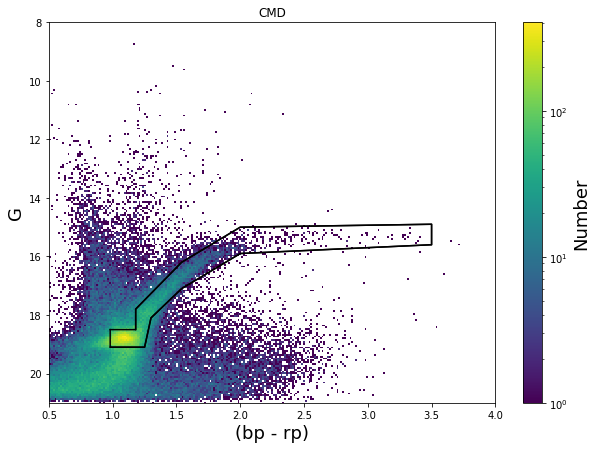

In [11]:
plt.figure(figsize=(10,7))


plt.hist2d(lmc_gaia_catalog_source_10deg_dec53['phot_bp_mean_mag'][good10_53] - lmc_gaia_catalog_source_10deg_dec53['phot_rp_mean_mag'][good10_53], 
          lmc_gaia_catalog_source_10deg_dec53['phot_g_mean_mag'][good10_53], range=None, bins=220, cmap='viridis', norm=LogNorm(), cmin=1)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('(bp - rp)', fontsize=18)
plt.ylabel('G', fontsize=18)
plt.xlim(0.5,4)
plt.ylim(8,21)
plt.gca().invert_yaxis()

x_vals = ([0.98, 0.98], [0.98, 1.25], [1.25, 1.3], [1.3, 1.54], [1.54, 2], [2, 3.5], 
          [3.5, 3.5], [3.5, 2], [2, 1.54], [1.54, 1.18], [1.18, 1.18], [1.18, 0.98])

y_vals = ([18.5, 19.1], [19.1, 19.1], [19.1, 18.1], [18.1, 17.1], [17.1, 15.9], [15.9, 15.6],
          [15.6, 14.9], [14.9, 15], [15, 16.2], [16.2, 17.8], [17.8, 18.5], [18.5, 18.5])

plt.plot(x_vals, y_vals, "BLACK")

# plt.plot([1.25,1.25], [12.5,14.5],"BLACK", [1.25,1.45], [14.5,14.5], "BLACK",
#         [1.45,1.6], [14.5,13], "BLACK", [1.6,1.8], [13,12.75], "BLACK", [1.8,3], [12.75,12.75], "BLACK", 
#         [3,3], [12.75,11], "BLACK", [3,1.7], [11,11], "BLACK", [1.7,1.25], [11,12.5], "BLACK" )

# coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
# coord.append(coord[0]) #repeat the first point to create a 'closed loop'

# xs, ys = zip(*coord) #create lists of x and y values

# plt.figure()
# plt.plot(xs,ys) 
plt.title("CMD")
cbar.set_label('Number', fontsize=18)
plt.show()

In [12]:
xcut = [0.98, 0.98, 1.25, 1.30, 1.54, 2.0, 3.5, 3.5, 3.5, 2, 1.54, 1.18, 1.18, 0.98]
ycut = [18.5, 19.1, 19.1, 18.1, 17.1, 15.9, 15.6, 14.9, 14.9, 15, 16.2, 17.8, 18.5, 18.5]
xdata = (good_catalog10_53['phot_bp_mean_mag']
         - good_catalog10_53['phot_rp_mean_mag'])
ydata = good_catalog10_53['phot_g_mean_mag']
ind, cutind = dln.roi_cut(xcut, ycut, xdata.data, ydata.data)

In [13]:
RGB_CMD_cut = good_catalog10_53[cutind]
leftover = good_catalog10_53[ind]
print(len(RGB_CMD_cut))
print(len(leftover))
print(len(cutind))
print(len(ind))

37234
72775
37234
72775


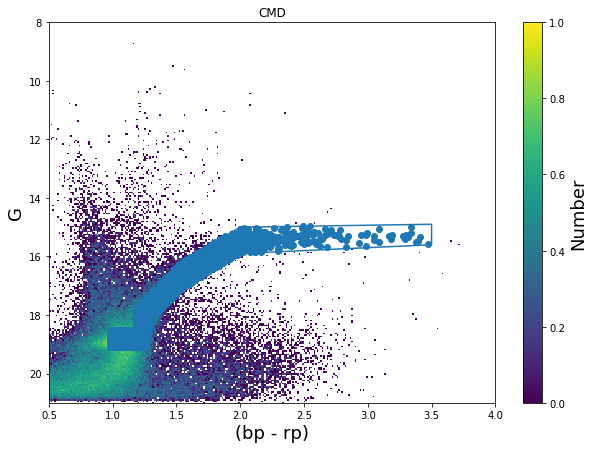

In [14]:
plt.figure(figsize=(10,7))


plt.hist2d(lmc_gaia_catalog_source_10deg_dec53['phot_bp_mean_mag'][good10_53] - lmc_gaia_catalog_source_10deg_dec53['phot_rp_mean_mag'][good10_53], 
          lmc_gaia_catalog_source_10deg_dec53['phot_g_mean_mag'][good10_53], range=None, bins=250, cmap='viridis', norm=LogNorm(), cmin=1)

plt.scatter(RGB_CMD_cut['phot_bp_mean_mag'] - RGB_CMD_cut['phot_rp_mean_mag'], 
          RGB_CMD_cut['phot_g_mean_mag'])


plt.plot(xcut, ycut)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('(bp - rp)', fontsize=18)
plt.ylabel('G', fontsize=18)
plt.xlim(0.5,4)
plt.ylim(8,21)
plt.gca().invert_yaxis()

# x_vals = ([0.95,0.95], [0.95, 1.275], [1.275, 1.275], [1.275, 1.6], [1.6, 2], [2, 3.5], 
#           [3.5, 3.5], [3.5, 2], [2, 1.5], [1.5, 1.125], [1.125, 1.125], [1.125, 0.95] )
# y_vals = ([18.5, 19.25], [19.25, 19.25], [19.25, 18.5], [18.5, 17], [17, 16], [16, 15.5],
#           [15.5, 14.75], [14.75, 14.75], [14.75, 15.9], [15.9, 17.8], [17.8, 18.5], [18.5, 18.5] )

# plt.plot(x_vals, y_vals, "BLACK")

# plt.plot([1.25,1.25], [12.5,14.5],"BLACK", [1.25,1.45], [14.5,14.5], "BLACK",
#         [1.45,1.6], [14.5,13], "BLACK", [1.6,1.8], [13,12.75], "BLACK", [1.8,3], [12.75,12.75], "BLACK", 
#         [3,3], [12.75,11], "BLACK", [3,1.7], [11,11], "BLACK", [1.7,1.25], [11,12.5], "BLACK" )

# coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
# coord.append(coord[0]) #repeat the first point to create a 'closed loop'

# xs, ys = zip(*coord) #create lists of x and y values

# plt.figure()
# plt.plot(xs,ys) 
plt.title("CMD")
cbar.set_label('Number', fontsize=18)
plt.show()

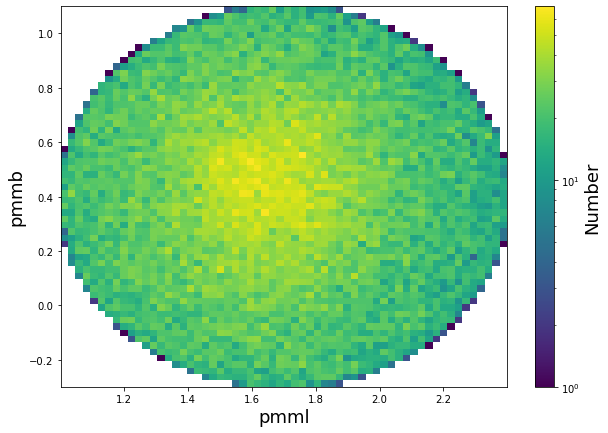

In [15]:
plt.figure(figsize=(10,7))

leftover = good_catalog10_53[ind]

plt.hist2d(leftover['pmml'], leftover['pmmb'],
           range=None, bins=60, cmap='viridis', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

plt.xlabel('pmml', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

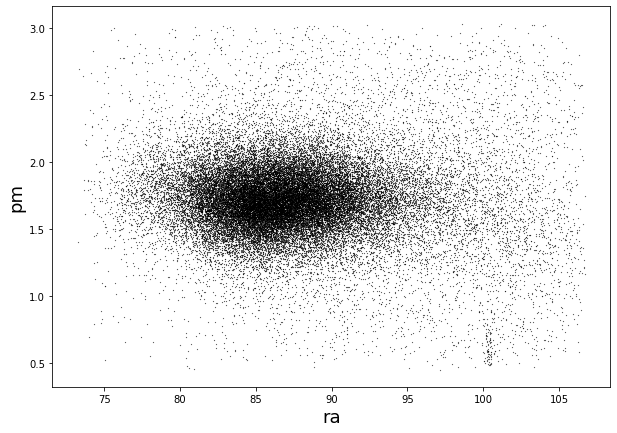

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(RGB_CMD_cut['ra'], RGB_CMD_cut['pm'],
         marker='^', s=0.1, color='black', linestyle='None', alpha=0.6)
plt.xlabel('ra', fontsize=18)
plt.ylabel('pm', fontsize=18)

# plt.xlim(0.425, 2.5)
# plt.ylim(0.15, -0.35)
# plt.gca().invert_yaxis()
plt.show()

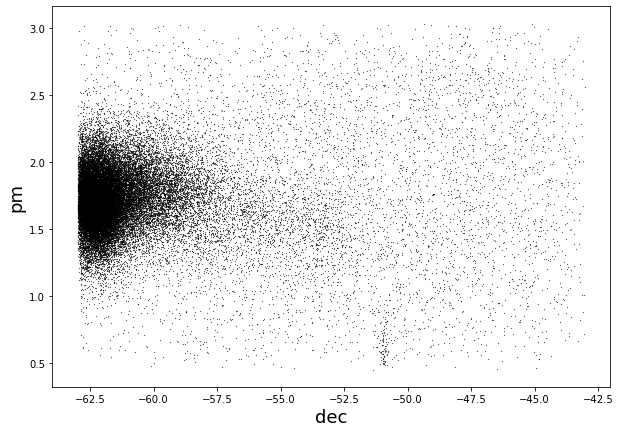

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(RGB_CMD_cut['dec'], RGB_CMD_cut['pm'],
         marker='^', s=0.1, color='black', linestyle='None', alpha=0.6)
plt.xlabel('dec', fontsize=18)
plt.ylabel('pm', fontsize=18)

# plt.xlim(0.425, 2.5)
# plt.ylim(0.15, -0.35)
# plt.gca().invert_yaxis()
plt.show()

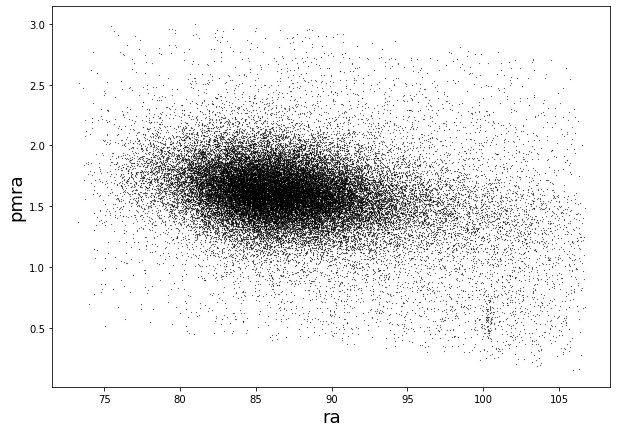

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(RGB_CMD_cut['ra'], RGB_CMD_cut['pmra'],
         marker='^', s=0.1, color='black', linestyle='None', alpha=0.6)
plt.xlabel('ra', fontsize=18)
plt.ylabel('pmra', fontsize=18)

# plt.xlim(0.425, 2.5)
# plt.ylim(0.15, -0.35)
# plt.gca().invert_yaxis()
plt.show()

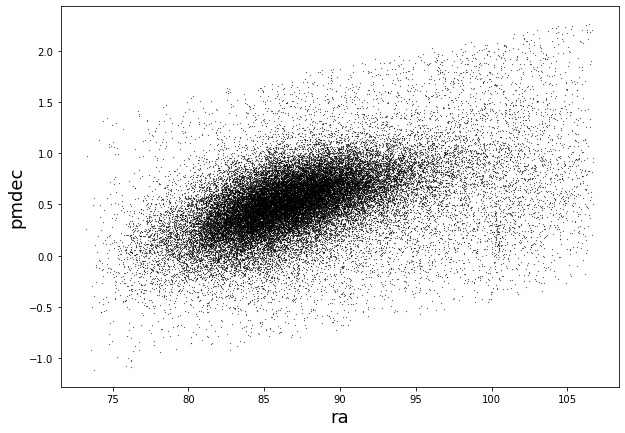

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(RGB_CMD_cut['ra'], RGB_CMD_cut['pmdec'],
         marker='^', s=0.1, color='black', linestyle='None', alpha=0.6)
plt.xlabel('ra', fontsize=18)
plt.ylabel('pmdec', fontsize=18)

# plt.xlim(0.425, 2.5)
# plt.ylim(0.15, -0.35)
# plt.gca().invert_yaxis()
plt.show()

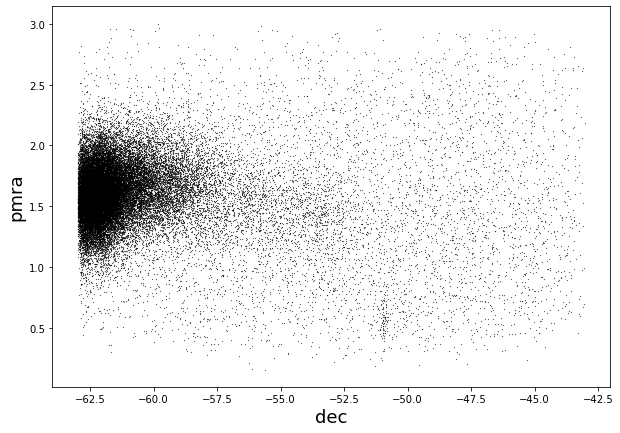

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(RGB_CMD_cut['dec'], RGB_CMD_cut['pmra'],
         marker='^', s=0.1, color='black', linestyle='None', alpha=0.6)
plt.xlabel('dec', fontsize=18)
plt.ylabel('pmra', fontsize=18)

# plt.xlim(0.425, 2.5)
# plt.ylim(0.15, -0.35)
# plt.gca().invert_yaxis()
plt.show()

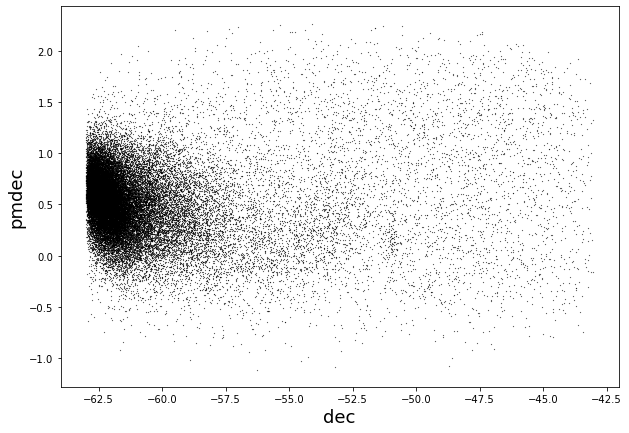

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(RGB_CMD_cut['dec'], RGB_CMD_cut['pmdec'],
         marker='^', s=0.1, color='black', linestyle='None', alpha=0.6)
plt.xlabel('dec', fontsize=18)
plt.ylabel('pmdec', fontsize=18)

# plt.xlim(0.425, 2.5)
# plt.ylim(0.15, -0.35)
# plt.gca().invert_yaxis()
plt.show()

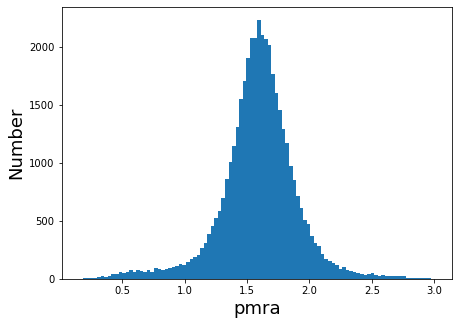

In [20]:
plt.figure(figsize=(7,5))
plt.hist(RGB_CMD_cut['pmra'], bins=100)
# plt.xlim(-5, 50)
plt.xlabel('pmra', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

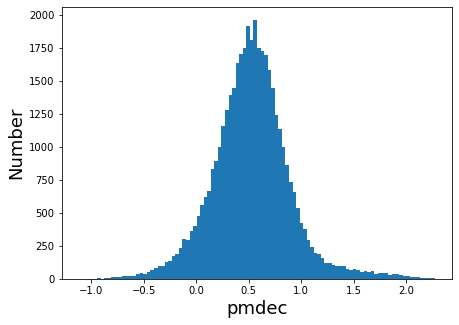

In [21]:
plt.figure(figsize=(7,5))
plt.hist(RGB_CMD_cut['pmdec'], bins=100)
# plt.xlim(-5, 50)
plt.xlabel('pmdec', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

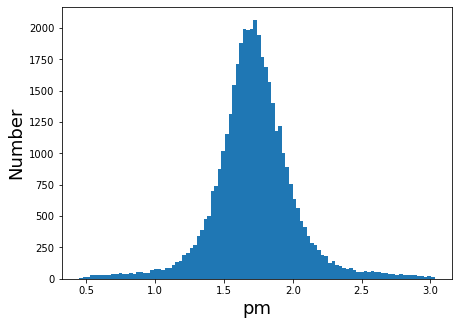

In [22]:
plt.figure(figsize=(7,5))
plt.hist(RGB_CMD_cut['pm'], bins=100)
# plt.xlim(-5, 50)
plt.xlabel('pm', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

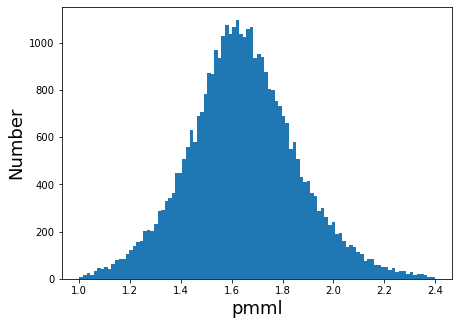

In [25]:
plt.figure(figsize=(7,5))
plt.hist(RGB_CMD_cut['pmml'], bins=100)
# plt.xlim(-5, 50)
plt.xlabel('pmml', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

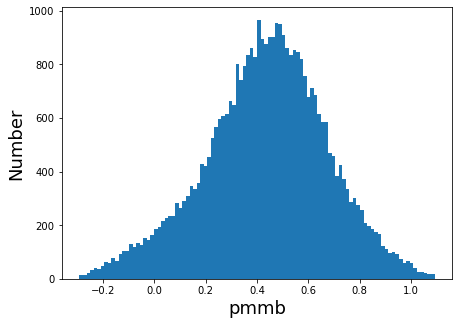

In [24]:
plt.figure(figsize=(7,5))
plt.hist(RGB_CMD_cut['pmmb'], bins=100)
# plt.xlim(-5, 50)
plt.xlabel('pmmb', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

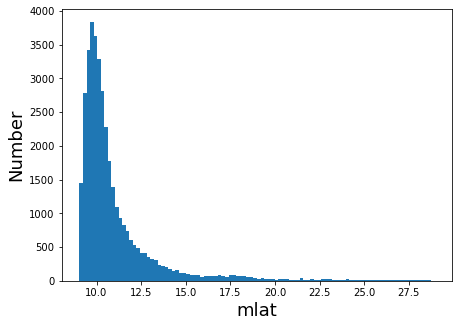

In [64]:
plt.figure(figsize=(7,5))
plt.hist(RGB_CMD_cut['mlat'], bins=100)
# plt.xlim(-5, 50)
plt.xlabel('mlat', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

# binned_statistic_2d() of ra vs dec color coded by mean pmra and pmdec

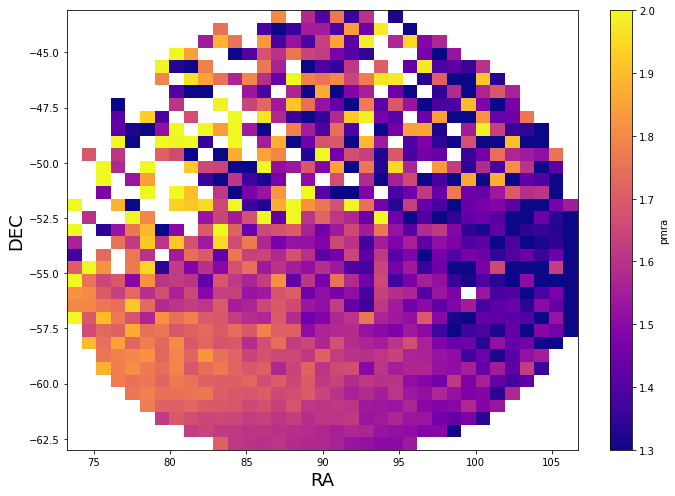

In [16]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['ra'], RGB_CMD_cut['dec'],
                RGB_CMD_cut['pmra'], statistic = "mean", bins=35)

plt.imshow(result.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin =1.3 , vmax=2)

plt.colorbar(label='pmra')

# plt.ylim(70,110)
# plt.xlim(0.4,3.25)

plt.xlabel('RA', fontsize=18)
plt.ylabel('DEC', fontsize=18)
plt.tight_layout()

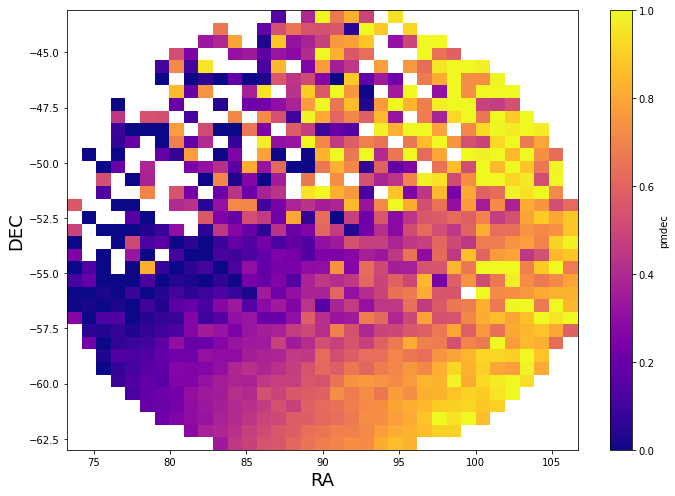

In [22]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['ra'], RGB_CMD_cut['dec'],
                RGB_CMD_cut['pmdec'], statistic = "mean", bins=35)

plt.imshow(result.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin =0 , vmax=1)

plt.colorbar(label='pmdec')

# plt.ylim(70,110)
# plt.xlim(0.4,3.25)

plt.xlabel('RA', fontsize=18)
plt.ylabel('DEC', fontsize=18)
plt.tight_layout()

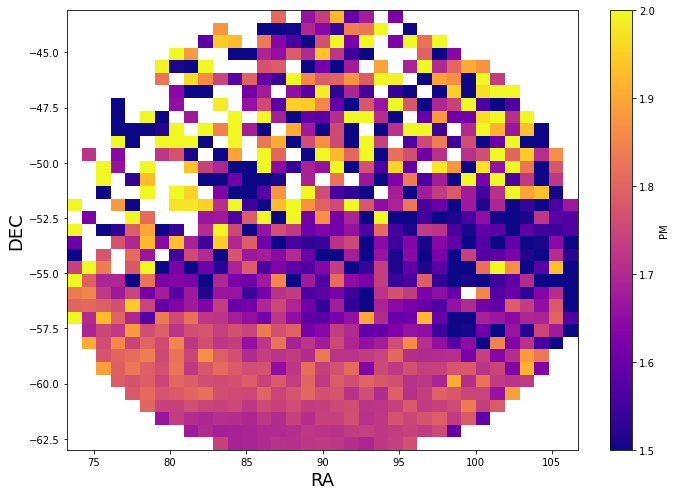

In [21]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['ra'], RGB_CMD_cut['dec'],
                RGB_CMD_cut['pm'], statistic = "mean", bins=35)

plt.imshow(result.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin =1.5 , vmax=2.0)

plt.colorbar(label='PM')



# plt.ylim(70,110)
# plt.xlim(0.4,3.25)

plt.xlabel('RA', fontsize=18)
plt.ylabel('DEC', fontsize=18)
plt.tight_layout()

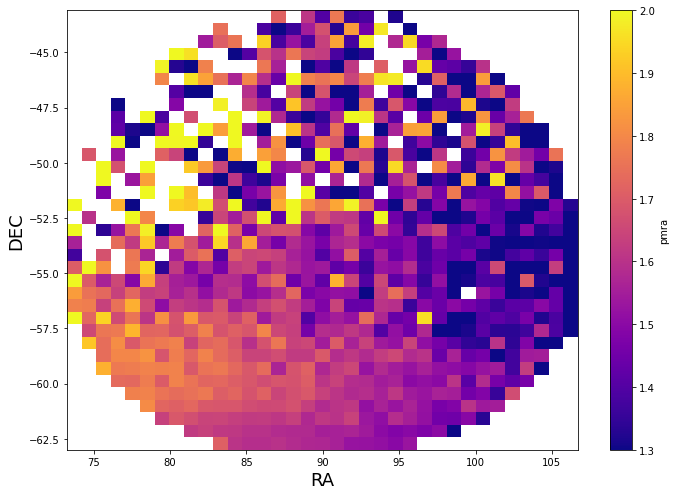

In [20]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['ra'], RGB_CMD_cut['dec'],
                RGB_CMD_cut['pmra'], statistic = "median", bins=35)

plt.imshow(result.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin =1.3 , vmax=2)

plt.colorbar(label='pmra')

# plt.ylim(70,110)
# plt.xlim(0.4,3.25)

plt.xlabel('RA', fontsize=18)
plt.ylabel('DEC', fontsize=18)
plt.tight_layout()

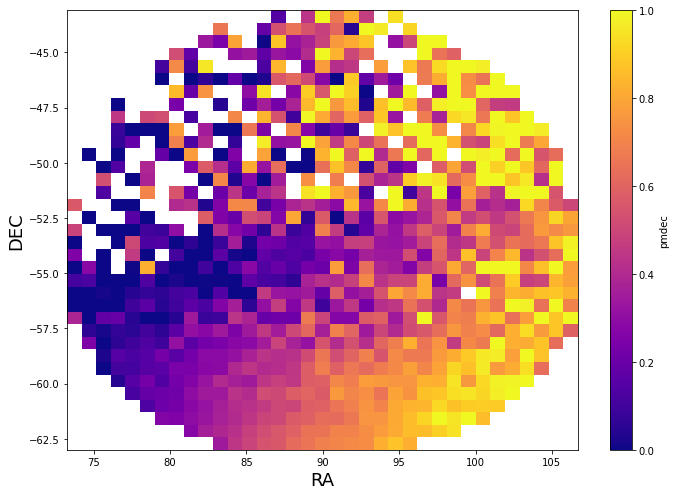

In [19]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['ra'], RGB_CMD_cut['dec'],
                RGB_CMD_cut['pmdec'], statistic = "median", bins=35)

plt.imshow(result.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin =0 , vmax=1)

plt.colorbar(label='pmdec')

# plt.ylim(70,110)
# plt.xlim(0.4,3.25)

plt.xlabel('RA', fontsize=18)
plt.ylabel('DEC', fontsize=18)
plt.tight_layout()

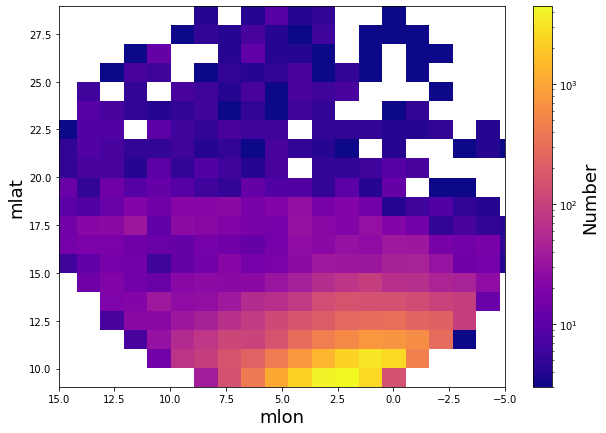

In [18]:
plt.figure(figsize=(10,7))
plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['mlat'],
           range=None, bins=20, cmap='plasma', norm=LogNorm(), cmin=3)
cbar = plt.colorbar(mappable=None, cax=None, ax=None)

plt.xlim(15,-5)
plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

# binned_statistic_2d() of mlon vs. mlat wrt pmml and pmmb

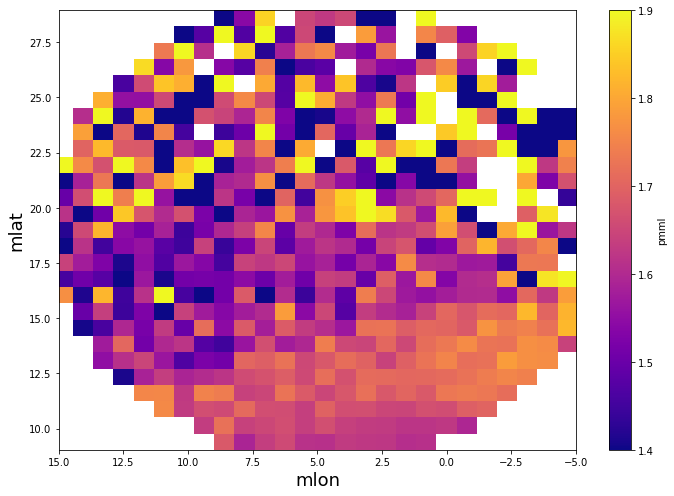

In [157]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['mlat'],
                RGB_CMD_cut['pmml'], statistic = "mean", bins=27)

plt.imshow(result.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin=1.4 , vmax=1.9)

plt.colorbar(label='pmml')

plt.xlim(15,-5)

# plt.ylim(70,110)
# plt.xlim(0.4,3.25)



plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
plt.tight_layout()

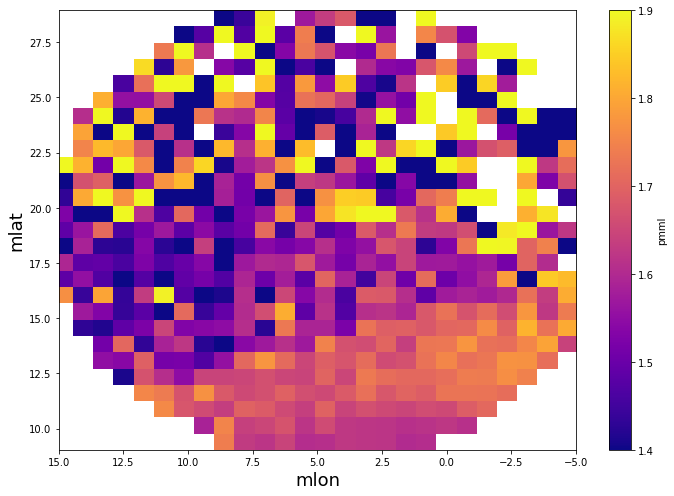

In [158]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['mlat'],
                RGB_CMD_cut['pmml'], statistic = "median", bins=27)

plt.imshow(result.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin=1.4 , vmax=1.9 )

plt.colorbar(label='pmml')

plt.xlim(15,-5)

# plt.ylim(70,110)
# plt.xlim(0.4,3.25)



plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
plt.tight_layout()

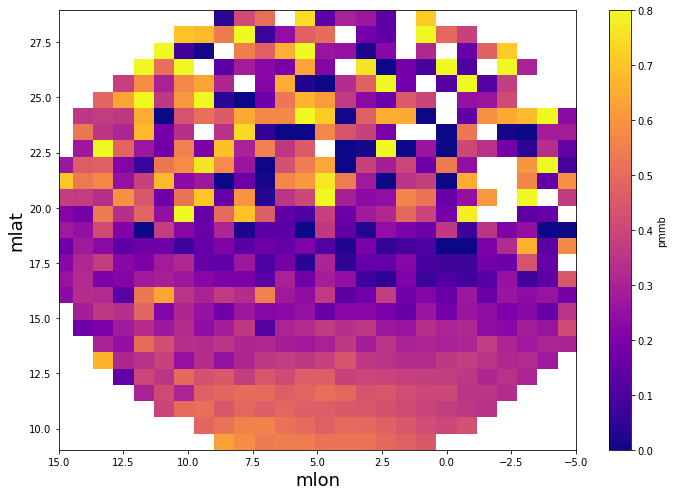

In [154]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['mlat'],
                RGB_CMD_cut['pmmb'], statistic = "mean", bins=27)

plt.imshow(result.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin=0.0 , vmax=0.8 )

plt.colorbar(label='pmmb')

plt.xlim(15,-5)

# plt.ylim(70,110)
# plt.xlim(0.4,3.25)



plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
plt.tight_layout()

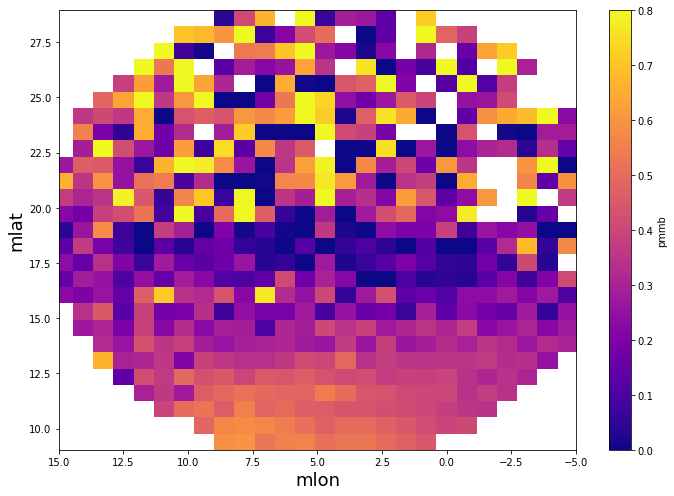

In [155]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['mlat'],
                RGB_CMD_cut['pmmb'], statistic = "median", bins=27)

plt.imshow(result.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin=0.0 , vmax=0.8 )

plt.colorbar(label='pmmb')

plt.xlim(15,-5)

# plt.ylim(70,110)
# plt.xlim(0.4,3.25)



plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
plt.tight_layout()

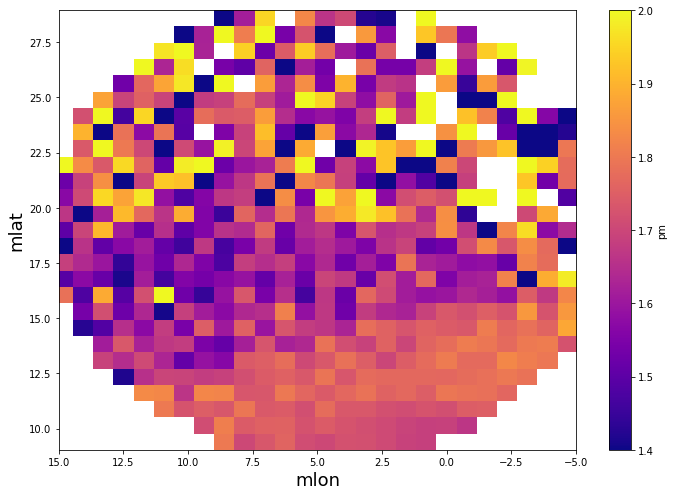

In [156]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['mlat'],
                RGB_CMD_cut['pm'], statistic = "mean", bins=27)

plt.imshow(result.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin=1.4 , vmax=2 )

plt.colorbar(label='pm')

plt.xlim(15,-5)

# plt.ylim(70,110)
# plt.xlim(0.4,3.25)



plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
plt.tight_layout()

# The Following code is to fit a 2D 4th order Polynomial fit to the trends in pmra and pmdec wtr ra and dec using np.poly1d(np.polyfit())

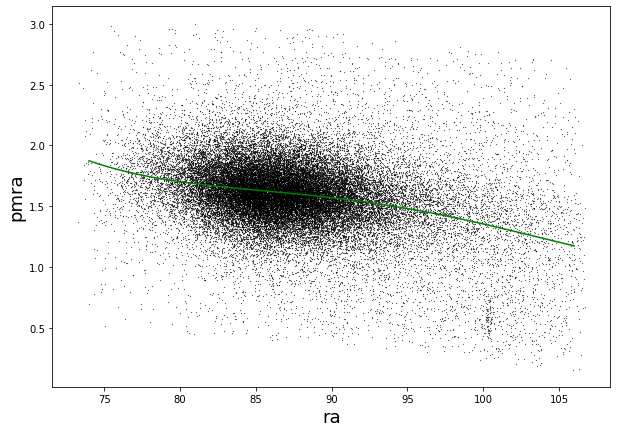

In [28]:
plt.figure(figsize=(10,7))

import matplotlib.pyplot as plt
import numpy as np

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['ra'], RGB_CMD_cut['pmra'] , 4))


plt.scatter(RGB_CMD_cut['ra'], RGB_CMD_cut['pmra'],
         marker='^', s=0.1, color='black', linestyle='None', alpha=0.6)
plt.xlabel('ra', fontsize=18)
plt.ylabel('pmra', fontsize=18)

polyline = np.linspace(74, 106, 100)
plt.plot(polyline, model1(polyline), color='green')

plt.show()


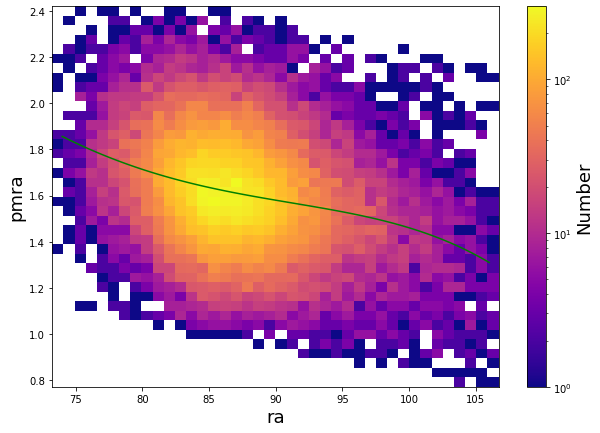

In [51]:
plt.figure(figsize=(10,7))


plt.hist2d(RGB_CMD_cut['ra'], RGB_CMD_cut['pmra'],
           range=None, bins=40, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['ra'], RGB_CMD_cut['pmra'] , 4))
polyline = np.linspace(74, 106, 100)
plt.plot(polyline, model1(polyline), color='green')


plt.xlabel('ra', fontsize=18)
plt.ylabel('pmra', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

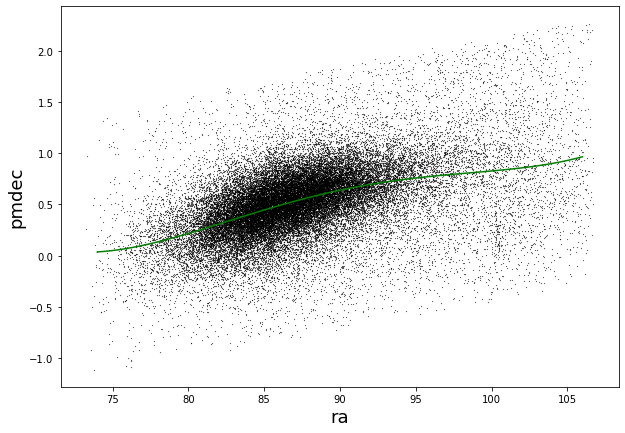

In [29]:
plt.figure(figsize=(10,7))

import matplotlib.pyplot as plt
import numpy as np

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['ra'], RGB_CMD_cut['pmdec'] , 4))


plt.scatter(RGB_CMD_cut['ra'], RGB_CMD_cut['pmdec'],
         marker='^', s=0.1, color='black', linestyle='None', alpha=0.6)
plt.xlabel('ra', fontsize=18)
plt.ylabel('pmdec', fontsize=18)

polyline = np.linspace(74, 106, 100)
plt.plot(polyline, model2(polyline), color='green')

plt.show()

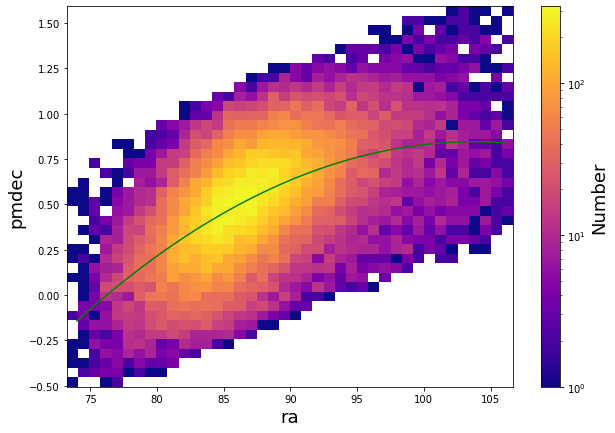

In [56]:
plt.figure(figsize=(10,7))


plt.hist2d(RGB_CMD_cut['ra'], RGB_CMD_cut['pmdec'],
           range=None, bins=40, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['ra'], RGB_CMD_cut['pmdec'] , 2))
polyline = np.linspace(74, 106, 100)
plt.plot(polyline, model1(polyline), color='green')


plt.xlabel('ra', fontsize=18)
plt.ylabel('pmdec', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

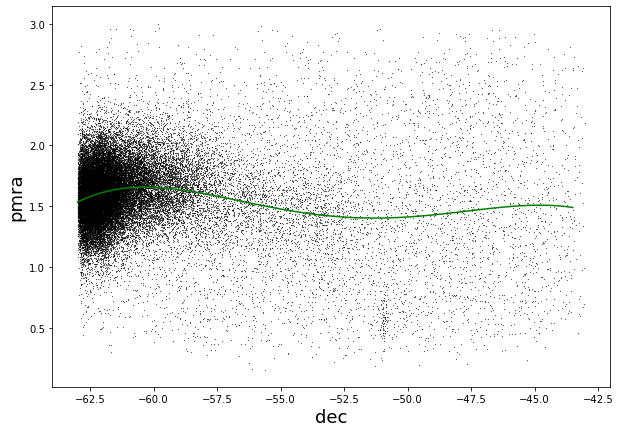

In [30]:
plt.figure(figsize=(10,7))

import matplotlib.pyplot as plt
import numpy as np

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['dec'], RGB_CMD_cut['pmra'] , 4))


plt.scatter(RGB_CMD_cut['dec'], RGB_CMD_cut['pmra'],
         marker='^', s=0.1, color='black', linestyle='None', alpha=0.6)
plt.xlabel('dec', fontsize=18)
plt.ylabel('pmra', fontsize=18)

polyline = np.linspace(-63, -43.5, 100)
plt.plot(polyline, model2(polyline), color='green')

plt.show()

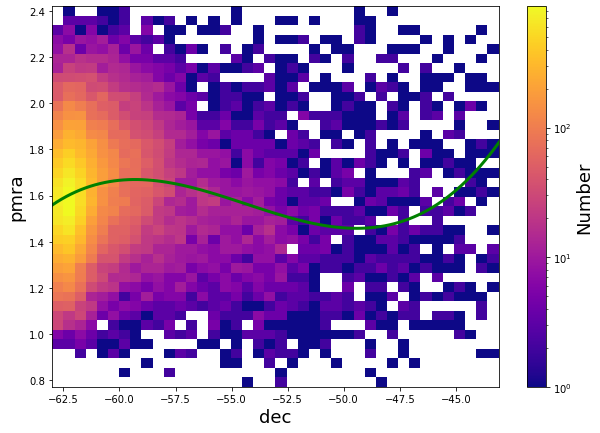

In [61]:
plt.figure(figsize=(10,7))


plt.hist2d(RGB_CMD_cut['dec'], RGB_CMD_cut['pmra'],
           range=None, bins=40, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['dec'], RGB_CMD_cut['pmra'] , 3))
polyline = np.linspace(-63, -42, 100)
plt.plot(polyline, model1(polyline), color='green', lw =3)


plt.xlabel('dec', fontsize=18)
plt.ylabel('pmra', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

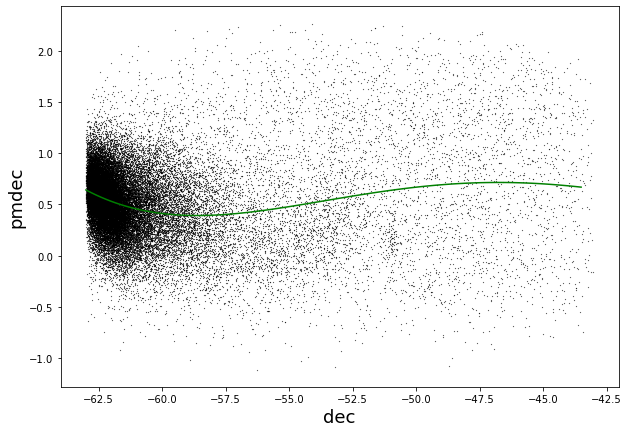

In [31]:
plt.figure(figsize=(10,7))

import matplotlib.pyplot as plt
import numpy as np

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['dec'], RGB_CMD_cut['pmdec'] , 4))


plt.scatter(RGB_CMD_cut['dec'], RGB_CMD_cut['pmdec'],
         marker='^', s=0.1, color='black', linestyle='None', alpha=0.6)
plt.xlabel('dec', fontsize=18)
plt.ylabel('pmdec', fontsize=18)

polyline = np.linspace(-63, -43.5, 100)
plt.plot(polyline, model2(polyline), color='green')

plt.show()

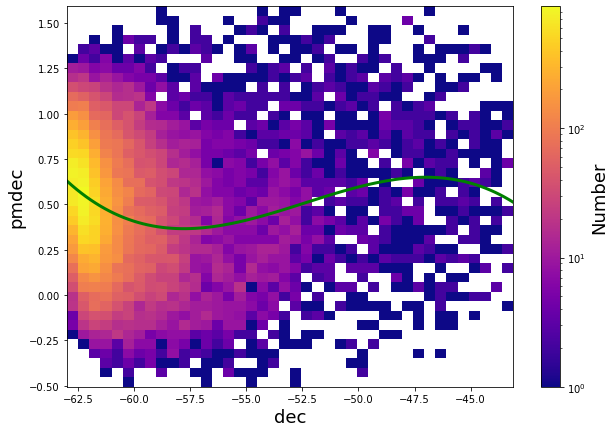

In [62]:
plt.figure(figsize=(10,7))


plt.hist2d(RGB_CMD_cut['dec'], RGB_CMD_cut['pmdec'],
           range=None, bins=40, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['dec'], RGB_CMD_cut['pmdec'] , 3))
polyline = np.linspace(-63, -42, 100)
plt.plot(polyline, model1(polyline), color='green', lw =3)


plt.xlabel('dec', fontsize=18)
plt.ylabel('pmdec', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

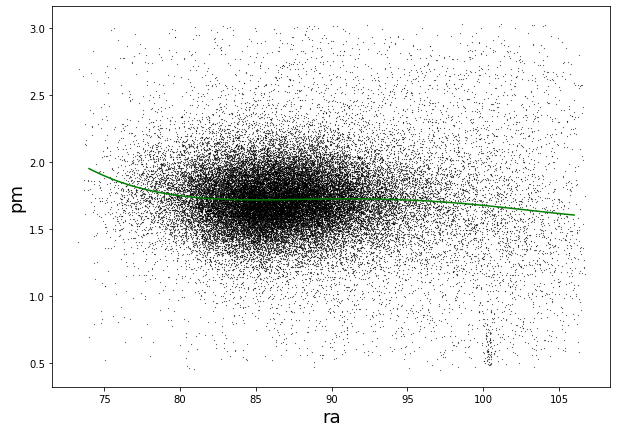

In [32]:
plt.figure(figsize=(10,7))

import matplotlib.pyplot as plt
import numpy as np

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['ra'], RGB_CMD_cut['pm'] , 4))


plt.scatter(RGB_CMD_cut['ra'], RGB_CMD_cut['pm'],
         marker='^', s=0.1, color='black', linestyle='None', alpha=0.6)
plt.xlabel('ra', fontsize=18)
plt.ylabel('pm', fontsize=18)

polyline = np.linspace(74, 106, 100)
plt.plot(polyline, model2(polyline), color='green')

plt.show()

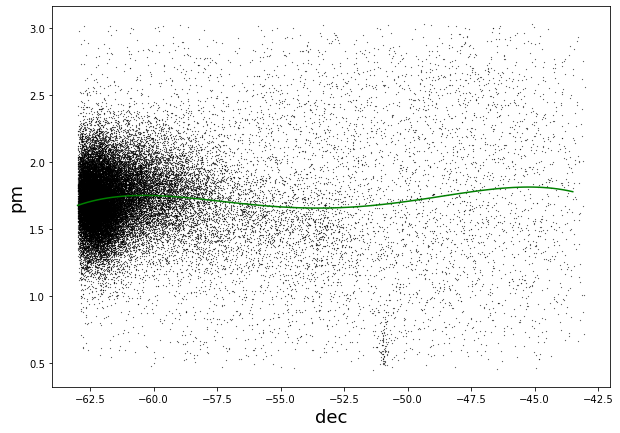

In [33]:
plt.figure(figsize=(10,7))

import matplotlib.pyplot as plt
import numpy as np

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['dec'], RGB_CMD_cut['pm'] , 4))


plt.scatter(RGB_CMD_cut['dec'], RGB_CMD_cut['pm'],
         marker='^', s=0.1, color='black', linestyle='None', alpha=0.6)
plt.xlabel('dec', fontsize=18)
plt.ylabel('pm', fontsize=18)

polyline = np.linspace(-63, -43.5, 100)
plt.plot(polyline, model2(polyline), color='green')

plt.show()

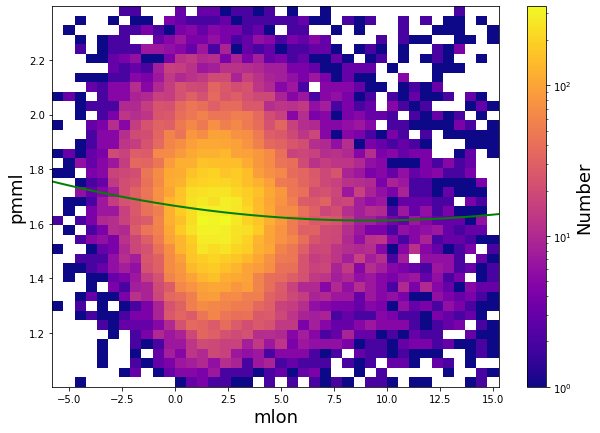

In [161]:
plt.figure(figsize=(10,7))


plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],
           range=None, bins=40, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'] , 2))
polyline = np.linspace(-6, 16, 100)
plt.plot(polyline, model1(polyline), color='green', lw=2)

plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmml', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

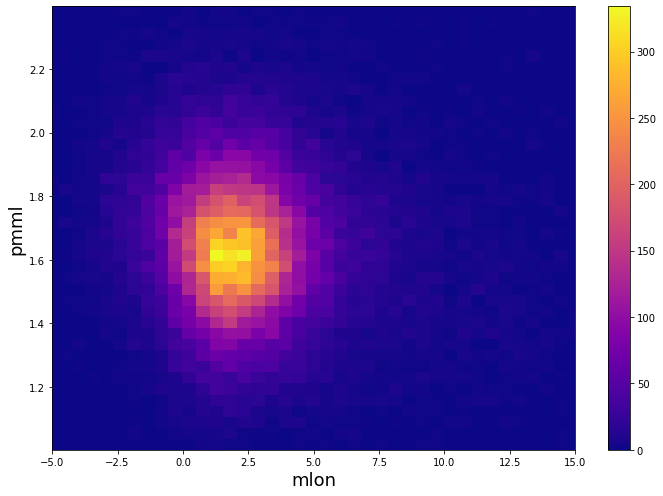

In [140]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic, binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'], RGB_CMD_cut['pmml'],
                statistic = "count", bins=40)


plt.imshow(result.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

plt.xlim(-5,15)

# plt.ylim(70,110)
# plt.xlim(0.4,3.25)



plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmml', fontsize=18)
plt.tight_layout()

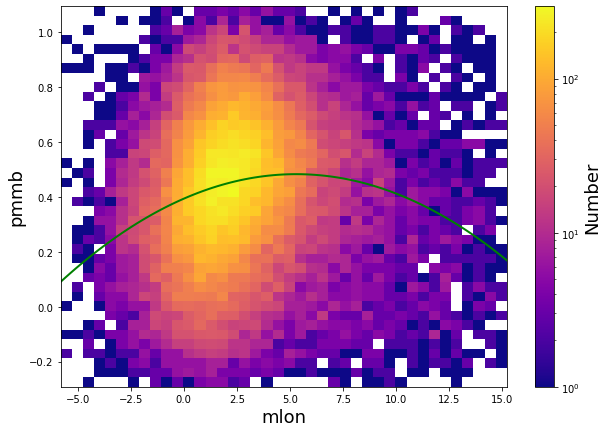

In [160]:
plt.figure(figsize=(10,7))


plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb'],
           range=None, bins=40, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb'] , 2))
polyline = np.linspace(-6, 16, 100)
plt.plot(polyline, model1(polyline), color='green',lw=2)

plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

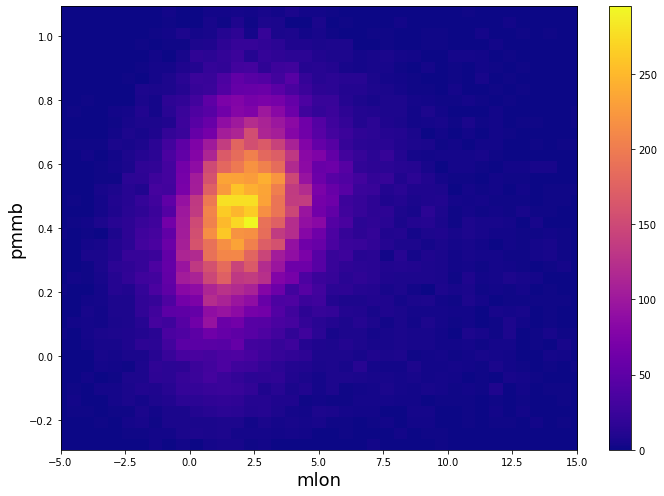

In [120]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic, binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb'], RGB_CMD_cut['pmmb'],
                statistic = "count", bins=40)


plt.imshow(result.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

plt.xlim(-5,15)

# plt.ylim(70,110)
# plt.xlim(0.4,3.25)



plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
plt.tight_layout()

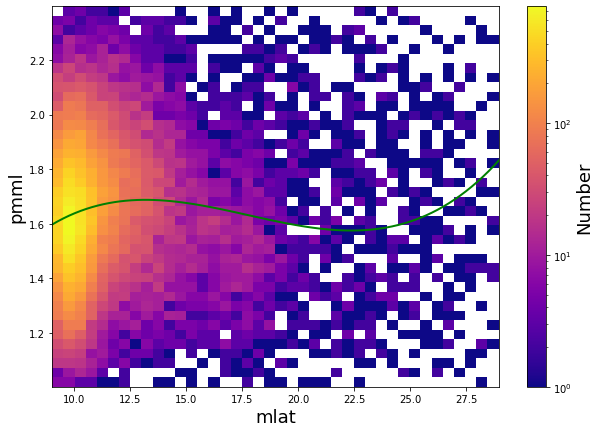

In [162]:
plt.figure(figsize=(10,7))


plt.hist2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'],
           range=None, bins=40, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'] , 3))
polyline = np.linspace(5, 30, 100)
plt.plot(polyline, model1(polyline), color='green',lw=2)

plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmml', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

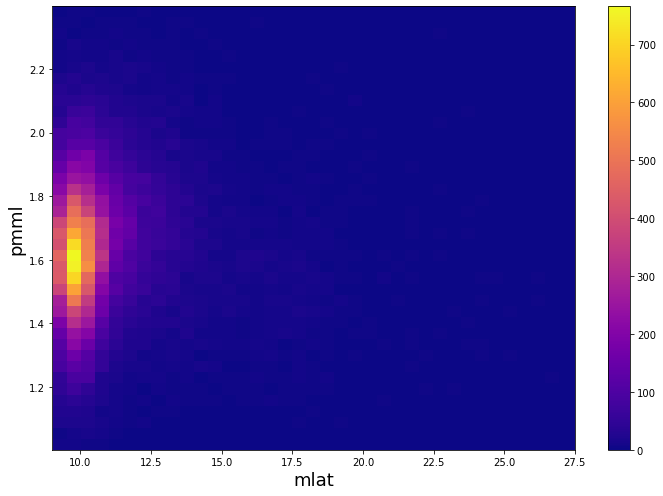

In [123]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic, binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'], RGB_CMD_cut['pmml'],
                statistic = "count", bins=40)


plt.imshow(result.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

plt.xlim(9,27.5)

# plt.ylim(70,110)
# plt.xlim(0.4,3.25)



plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmml', fontsize=18)
plt.tight_layout()

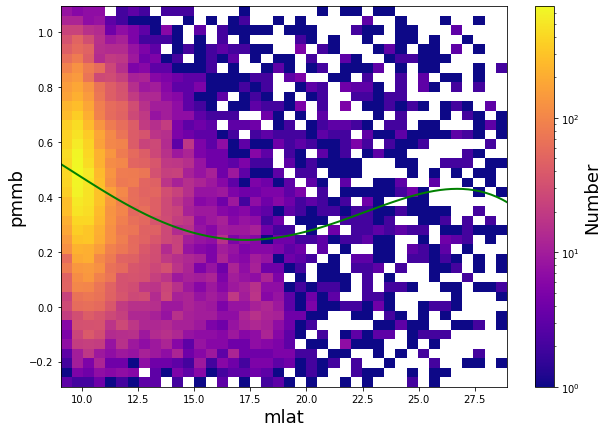

In [163]:
plt.figure(figsize=(10,7))


plt.hist2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'],
           range=None, bins=40, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'] , 4))
polyline = np.linspace(5, 30, 100)
plt.plot(polyline, model1(polyline), color='green',lw=2)

plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

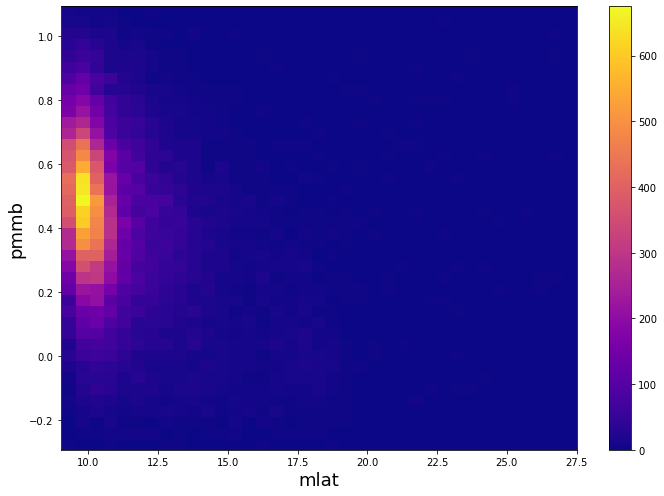

In [21]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic, binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'], RGB_CMD_cut['pmmb'],
                statistic = "count", bins=40)


plt.imshow(result.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

plt.xlim(9,27.5)

# plt.ylim(70,110)
# plt.xlim(0.4,3.25)



plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
plt.tight_layout()

# Normalized binned_statistic_2d() (wrt to total number in each column) of pmml & pmmb wrt mlon and mlat

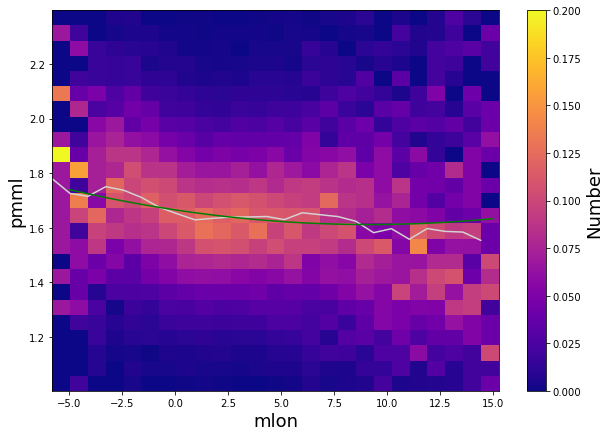

In [95]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(10,7))

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'], RGB_CMD_cut['pmml'],
                statistic = "count", bins=25)

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

# plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],
#            range=None, bins=40, cmap='plasma', norm=LogNorm(), cmin=3)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)


result,xedge,binnumber = binned_statistic(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],
                statistic = "mean", bins=25)
plt.plot(xedge[:-1],result, c='lightgray')


model2 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'] , 2))
polyline = np.linspace(-5, 15, 100)
plt.plot(polyline, model2(polyline), color='green')

# plt.xlim(15,-5)
plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmml', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

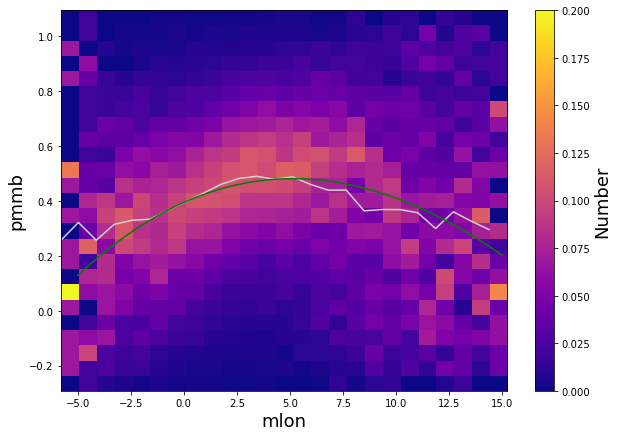

In [150]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(10,7))

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb'], RGB_CMD_cut['pmmb'],
                statistic = "count", bins=25)

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

# plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],
#            range=None, bins=40, cmap='plasma', norm=LogNorm(), cmin=3)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)


result,xedge,binnumber = binned_statistic(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb'],
                statistic = "mean", bins=25)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb'] , 3))

# result2 = result.copy()
polyline = np.linspace(-5, 15, 100)
plt.plot(polyline, model2(polyline), color='green')


plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

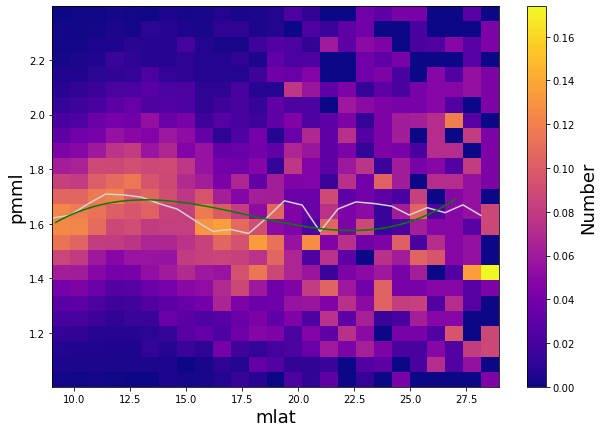

In [83]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(10,7))

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'], RGB_CMD_cut['pmml'],
                statistic = "count", bins=25)

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

# plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],
#            range=None, bins=40, cmap='plasma', norm=LogNorm(), cmin=3)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)


result,xedge,binnumber = binned_statistic(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'],
                statistic = "mean", bins=25)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'] , 3))

# result2 = result.copy()
polyline = np.linspace(9.2, 27, 100)
plt.plot(polyline, model2(polyline), color='green')

# plt.xlim(15,-5)
plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmml', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

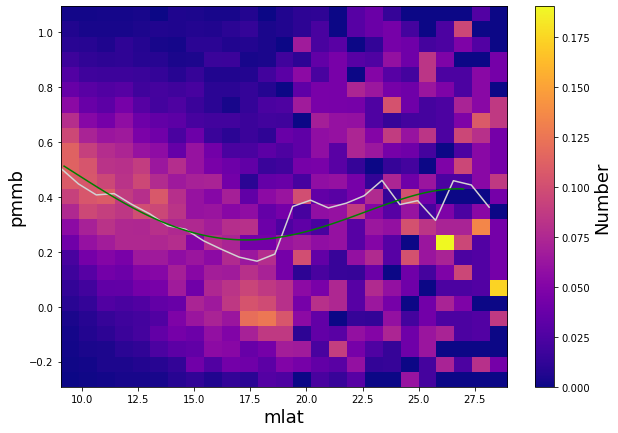

In [81]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(10,7))

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'], RGB_CMD_cut['pmmb'],
                statistic = "count", bins=25)

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

# plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],
#            range=None, bins=40, cmap='plasma', norm=LogNorm(), cmin=3)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)


result,xedge,binnumber = binned_statistic(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'],
                statistic = "mean", bins=25)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'] , 4))

# result2 = result.copy()
polyline = np.linspace(9.2, 27, 100)
plt.plot(polyline, model2(polyline), color='green')

# plt.xlim(15,-5)
plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

# # The Following code is to fit a 2D Polynomial to the trends in pmra and pmdec wtr ra and dec using (param,cov) = np.polyfit()

np.polyfit() straight line estimate:
m= -0.016 b= 2.980


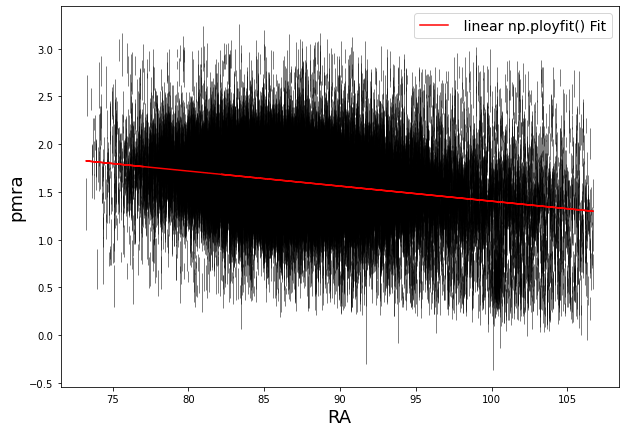

In [34]:
plt.figure(figsize=(10,7))

x = RGB_CMD_cut['ra']
y = RGB_CMD_cut['pmra']
yerr = RGB_CMD_cut['pmra_error']

(param,cov) = np.polyfit(x,y,1,w=1/yerr,cov=True)
fitp = np.poly1d(param)
yfit = fitp(x)

plt.errorbar(x, y, yerr=yerr, fmt=".k", markersize=0.01, elinewidth=0.5)
plt.plot(x, yfit,'r',lw=1.5, label=" linear np.ployfit() Fit")
plt.legend(fontsize=14)
plt.xlabel('RA', fontsize=18)
plt.ylabel('pmra', fontsize=18)

print("np.polyfit() straight line estimate:")
print("m= {:.3f} b= {:.3f}".format(param[0],param[1]))

np.polyfit() straight line estimate:
m= 0.031 b= -2.238


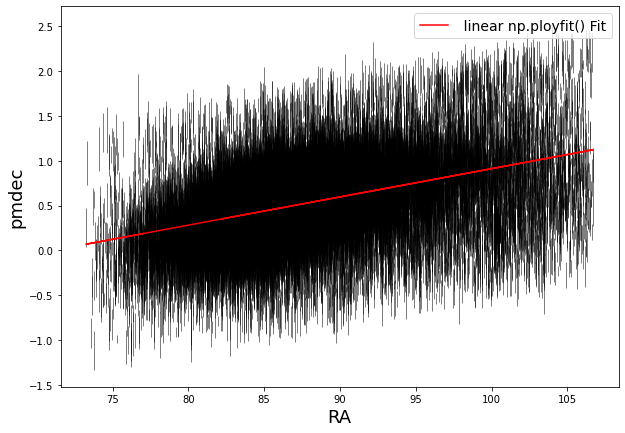

In [35]:
plt.figure(figsize=(10,7))

x = RGB_CMD_cut['ra']
y = RGB_CMD_cut['pmdec']
yerr = RGB_CMD_cut['pmdec_error']

(param,cov) = np.polyfit(x,y,1,w=1/yerr,cov=True)
fitp = np.poly1d(param)
yfit = fitp(x)

plt.errorbar(x, y, yerr=yerr, fmt=".k", markersize=0.01, elinewidth=0.5)
plt.plot(x, yfit,'r',lw=1.5, label=" linear np.ployfit() Fit")
plt.legend(fontsize=14)
plt.xlabel('RA', fontsize=18)
plt.ylabel('pmdec', fontsize=18)

print("np.polyfit() straight line estimate:")
print("m= {:.3f} b= {:.3f}".format(param[0],param[1]))

np.polyfit() 4th order estimate:
a= -0.000 b= -0.012 c= -0.920 d= -31.978 e= -413.059


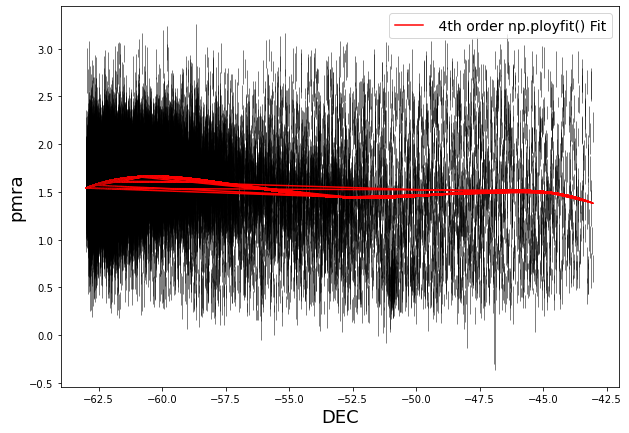

In [36]:
plt.figure(figsize=(10,7))

x = RGB_CMD_cut['dec']
y = RGB_CMD_cut['pmra']
yerr = RGB_CMD_cut['pmra_error']

(param,cov) = np.polyfit(x,y,4,w=1/yerr,cov=True)
fitp = np.poly1d(param)
yfit = fitp(x)

plt.errorbar(x, y, yerr=yerr, fmt=".k", markersize=0.01, elinewidth=0.5)
plt.plot(x, yfit,'r',lw=1.5, label=" 4th order np.ployfit() Fit")
plt.legend(fontsize=14)
plt.xlabel('DEC', fontsize=18)
plt.ylabel('pmra', fontsize=18)

print("np.polyfit() 4th order estimate:")
print("a= {:.3f} b= {:.3f} c= {:.3f} d= {:.3f} e= {:.3f}".format(param[0],param[1],param[2],param[3],param[4]))

np.polyfit() 4th order estimate:
a= -0.000 b= -0.001 c= -0.135 d= -6.137 e= -96.947


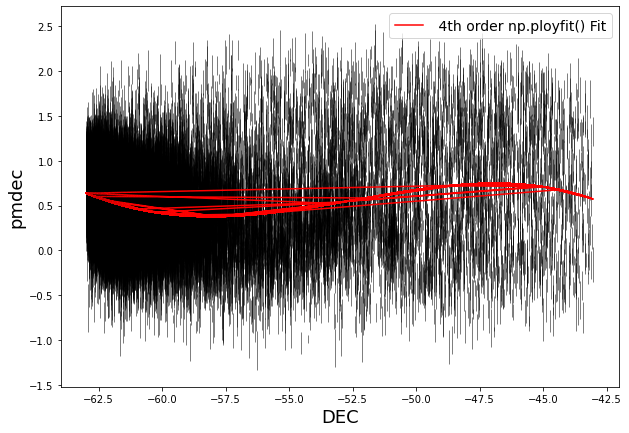

In [37]:
plt.figure(figsize=(10,7))

x = RGB_CMD_cut['dec']
y = RGB_CMD_cut['pmdec']
yerr = RGB_CMD_cut['pmdec_error']

(param,cov) = np.polyfit(x,y,4,w=1/yerr,cov=True)
fitp = np.poly1d(param)
yfit = fitp(x)

plt.errorbar(x, y, yerr=yerr, fmt=".k", markersize=0.01, elinewidth=0.5)
plt.plot(x, yfit,'r',lw=1.5, label=" 4th order np.ployfit() Fit")
plt.legend(fontsize=14)
plt.xlabel('DEC', fontsize=18)
plt.ylabel('pmdec', fontsize=18)

print("np.polyfit() 4th order estimate:")
print("a= {:.3f} b= {:.3f} c= {:.3f} d= {:.3f} e= {:.3f}".format(param[0],param[1],param[2],param[3],param[4]))

np.polyfit() quadratic estimate:
a= -0.000 b= 0.031 c= 0.881


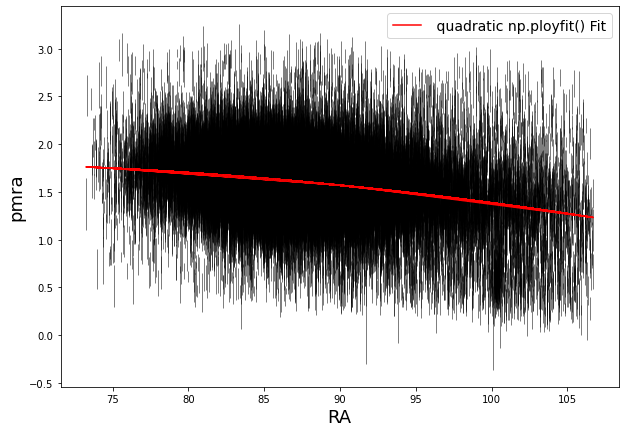

In [38]:
plt.figure(figsize=(10,7))

x = RGB_CMD_cut['ra']
y = RGB_CMD_cut['pmra']
yerr = RGB_CMD_cut['pmra_error']

(param,cov) = np.polyfit(x,y,2,w=1/yerr,cov=True)
fitp = np.poly1d(param)
yfit = fitp(x)

plt.errorbar(x, y, yerr=yerr, fmt=".k", markersize=0.01, elinewidth=0.5)
plt.plot(x, yfit,'r',lw=1.5, label=" quadratic np.ployfit() Fit")
plt.legend(fontsize=14)
plt.xlabel('RA', fontsize=18)
plt.ylabel('pmra', fontsize=18)

print("np.polyfit() quadratic estimate:")
print("a= {:.3f} b= {:.3f} c= {:.3f}".format(param[0],param[1],param[2]))

np.polyfit() Third order estimate:
a= -0.000 b= 0.006 c= -0.494 d= 16.529


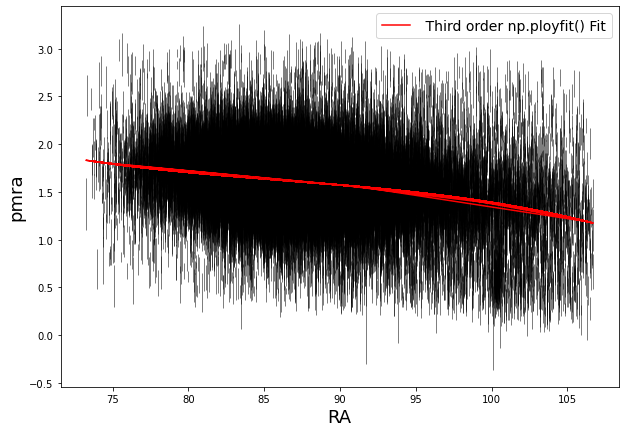

In [39]:
plt.figure(figsize=(10,7))

x = RGB_CMD_cut['ra']
y = RGB_CMD_cut['pmra']
yerr = RGB_CMD_cut['pmra_error']

(param,cov) = np.polyfit(x,y,3,w=1/yerr,cov=True)
fitp = np.poly1d(param)
yfit = fitp(x)

plt.errorbar(x, y, yerr=yerr, fmt=".k", markersize=0.01, elinewidth=0.5)
plt.plot(x, yfit,'r',lw=1.5, label=" Third order np.ployfit() Fit")
plt.legend(fontsize=14)
plt.xlabel('RA', fontsize=18)
plt.ylabel('pmra', fontsize=18)

print("np.polyfit() Third order estimate:")
print("a= {:.3f} b= {:.3f} c= {:.3f} d= {:.3f}".format(param[0],param[1],param[2],param[3]))

# The Following code is to fit a 2D 4th order Polynomial fit to the trends in pmra and pmdec wtr ra and dec using method of least squares

Least-squares estimates:
m = -0.016 ± 0.000
b = 2.980 ± 0.009


Text(0, 0.5, 'pmra')

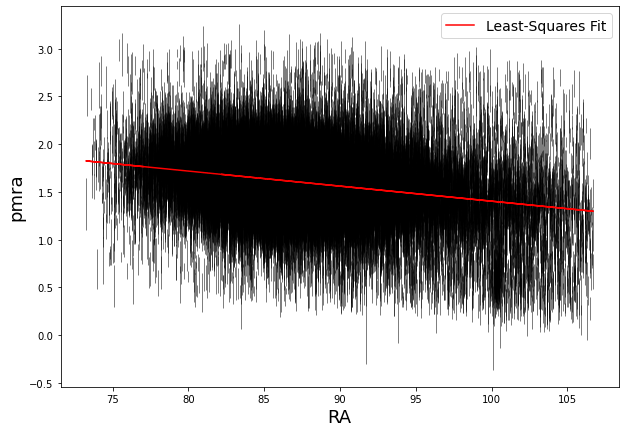

In [41]:
from scipy.optimize import minimize

plt.figure(figsize=(10,7))

x = RGB_CMD_cut['ra']
y = RGB_CMD_cut['pmra']
yerr = RGB_CMD_cut['pmra_error']

# Do linear least squares
A = np.vander(x, 2)
C = np.diag(yerr * yerr)
ATA = np.dot(A.T, A / (yerr**2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr**2)) # Invert to find the solution
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))

# Plot results
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0, markersize=0.01, elinewidth=0.5)
plt.plot(x, np.dot(np.vander(x, 2), w) ,'r', label="Least-Squares Fit")
plt.legend(fontsize=14)
# plt.xlim(0, 10)
plt.xlabel("RA", fontsize=18)
plt.ylabel("pmra", fontsize=18)

In [ ]:
def cov2cor(cov):
    n = len(cov[0])
    diag = np.sqrt(np.diag(cov))
    a = np.vstack([diag]*n)
    b = diag.reshape(n,1)
    c = np.hstack([b]*n) * a
    inv = 1/c
    return(inv * cov)

print("Covariance Matrix: ")
print(cov)
cor = cov2cor(cov)
print("Correlation Matrix: ")
print(cor)
print("m= {:.3f} +/- {:.3f}\nb= {:.3f} +/- {:.3f}".format(param[0],np.sqrt(cov[0,0]),param[1],np.sqrt(cov[1,1])))

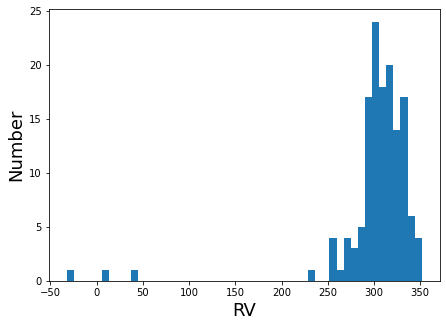

In [50]:
plt.figure(figsize=(7,5))
plt.hist(RGB_CMD_cut['radial_velocity'], bins=50)
# plt.xlim(-5, 50)
plt.xlabel('RV', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

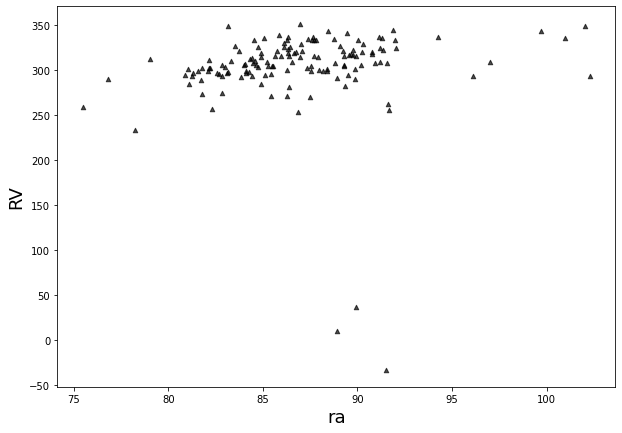

In [63]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['ra'], RGB_CMD_cut['radial_velocity'],
         marker='^', s=20, color='black', linestyle='None', alpha=0.7)
plt.xlabel('ra', fontsize=18)
plt.ylabel('RV', fontsize=18)

# plt.xlim(0.425, 2.5)
# plt.ylim(0.15, -0.35)
# plt.gca().invert_yaxis()
plt.show()

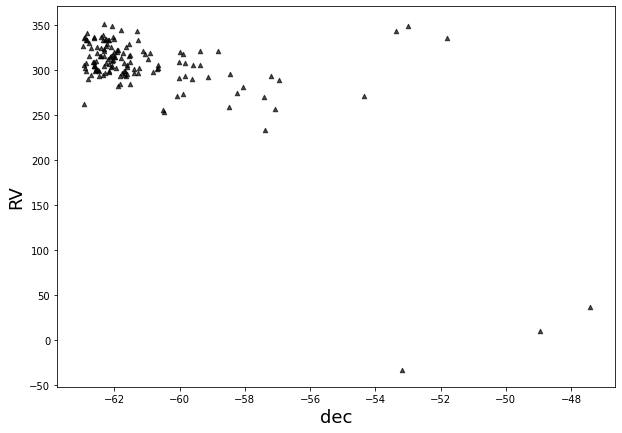

In [64]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['dec'], RGB_CMD_cut['radial_velocity'],
         marker='^', s=20, color='black', linestyle='None', alpha=0.7)
plt.xlabel('dec', fontsize=18)
plt.ylabel('RV', fontsize=18)

# plt.xlim(0.425, 2.5)
# plt.ylim(0.15, -0.35)
# plt.gca().invert_yaxis()
plt.show()

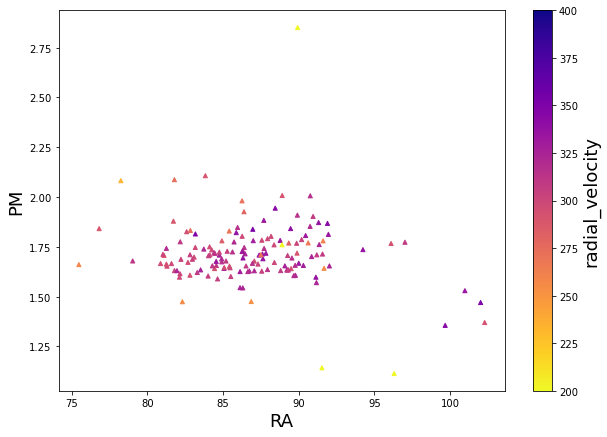

In [70]:
plt.figure(figsize=(10,7))

RV = RGB_CMD_cut['radial_velocity']

c=plt.scatter(RGB_CMD_cut['ra'], RGB_CMD_cut['pm'], marker = "^", 
            c=RV, s=17, cmap='plasma_r', vmin=200, vmax=400)


cbar = plt.colorbar(c)
cbar.set_label('radial_velocity', fontsize=18)

plt.xlabel('RA', fontsize=18)
plt.ylabel('PM', fontsize=18)


plt.show()

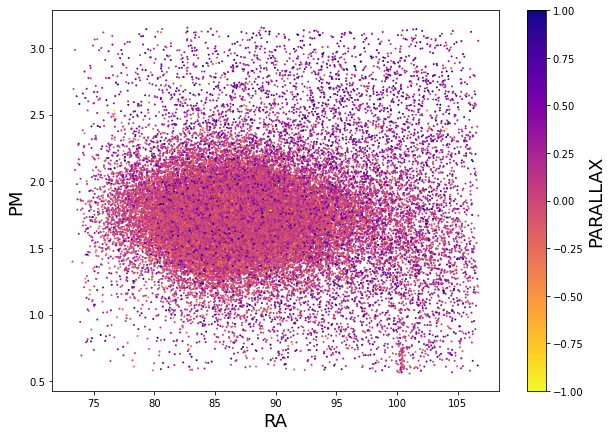

In [63]:
plt.figure(figsize=(10,7))

parallax = RGB_CMD_cut['parallax']

c=plt.scatter(RGB_CMD_cut['ra'], RGB_CMD_cut['pm'],  
            c=parallax, s=1, cmap='plasma_r', vmin = -1, vmax =1)


cbar = plt.colorbar(c)
cbar.set_label('PARALLAX', fontsize=18)

plt.xlabel('RA', fontsize=18)
plt.ylabel('PM', fontsize=18)

plt.show()

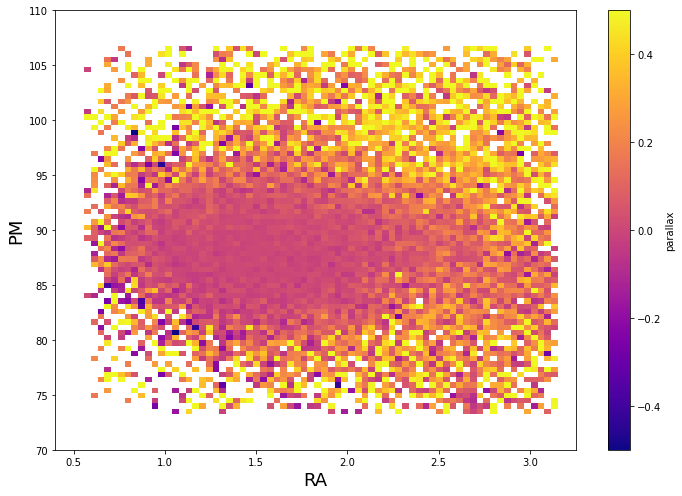

In [92]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['pm'], RGB_CMD_cut['ra'],
                RGB_CMD_cut['parallax'], statistic = "mean", bins=70)

plt.imshow(result,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin =-0.5 , vmax= 0.5)

plt.colorbar(label='parallax')

plt.ylim(70,110)
plt.xlim(0.4,3.25)

plt.xlabel('RA', fontsize=18)
plt.ylabel('PM', fontsize=18)
plt.tight_layout()

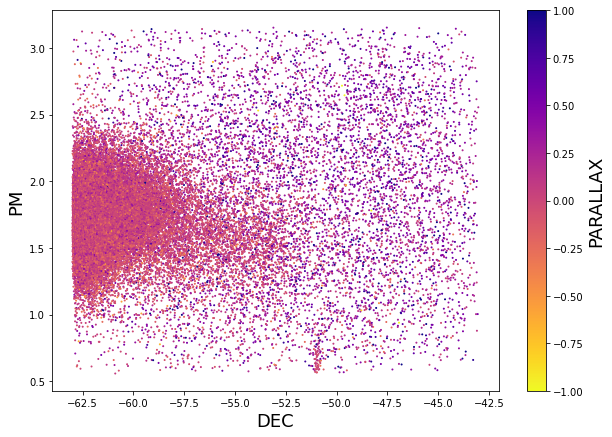

In [81]:
plt.figure(figsize=(10,7))

parallax = RGB_CMD_cut['parallax']

c=plt.scatter(RGB_CMD_cut['dec'], RGB_CMD_cut['pm'],  
            c=parallax, s=1, cmap='plasma_r', vmin = -1, vmax =1)


cbar = plt.colorbar(c)
cbar.set_label('PARALLAX', fontsize=18)

plt.xlabel('DEC', fontsize=18)
plt.ylabel('PM', fontsize=18)

plt.show()

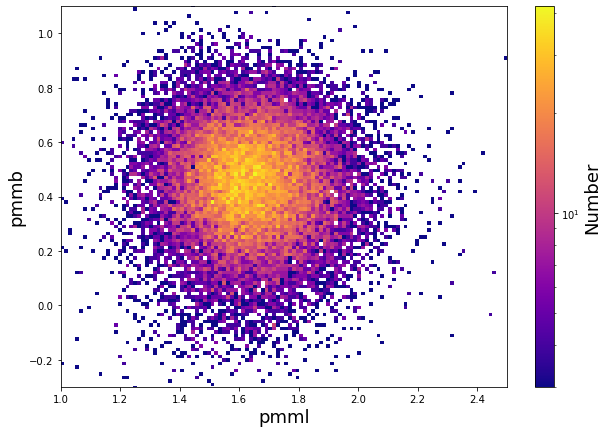

In [61]:
plt.figure(figsize=(10,7))
plt.hist2d(RGB_CMD_cut['pmml'], RGB_CMD_cut['pmmb'],
           range=None, bins=200, cmap='plasma', norm=LogNorm(), cmin=3)
cbar = plt.colorbar(mappable=None, cax=None, ax=None)


plt.xlabel('pmml', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
plt.xlim(1,2.5)
plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

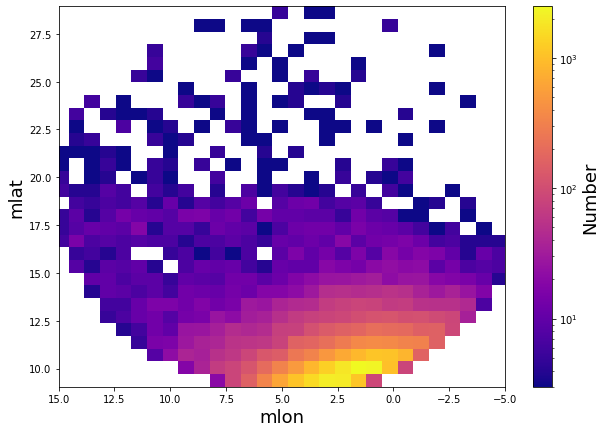

In [166]:
plt.figure(figsize=(10,7))
plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['mlat'],
           range=None, bins=30, cmap='plasma', norm=LogNorm(), cmin=3)
cbar = plt.colorbar(mappable=None, cax=None, ax=None)

plt.xlim(15,-5)
plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

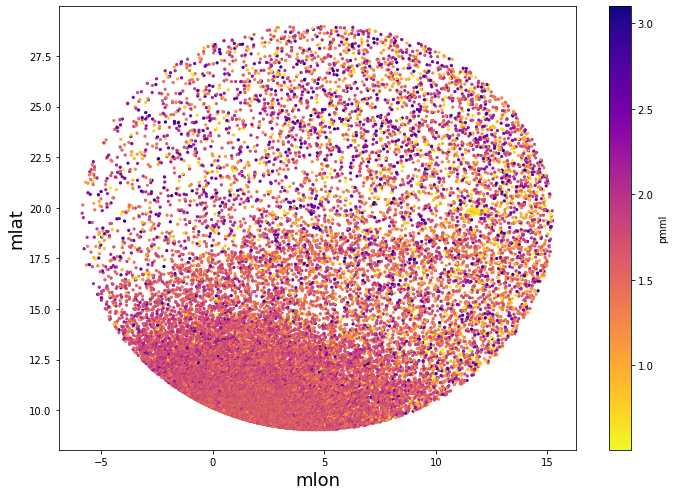

In [78]:
plt.figure(figsize=(10,7))


plt.scatter(RGB_CMD_cut['mlon'], RGB_CMD_cut['mlat'],
                c=RGB_CMD_cut['pmml'], s=5, cmap='plasma_r')

# plt.plot([1.7,1.7], [-1,2.5], "BLACK")
# plt.plot([15,20], [0,0], "BLACK")

plt.colorbar(label='pmml')

# cbar = plt.colorbar(c)
# cbar.set_label('pmml', fontsize=18)

# plt.text(0.1, 1.75, "pmml mean: 1.673", c="Black", fontsize=12)
# plt.text(0.1, 1.6, "pmmb mean: 0.508", c="Black", fontsize=12)

# plt.xlim(0,3.5)
# plt.ylim(-1,2)

plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
plt.tight_layout()

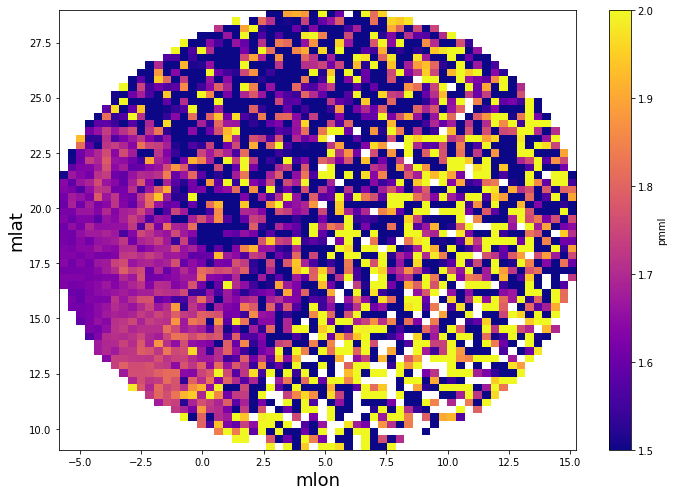

In [72]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['mlat'],
                RGB_CMD_cut['pmml'], statistic = "mean", bins=60)

plt.imshow(result,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin =1.5 , vmax= 2)

plt.colorbar(label='pmml')


plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
plt.tight_layout()

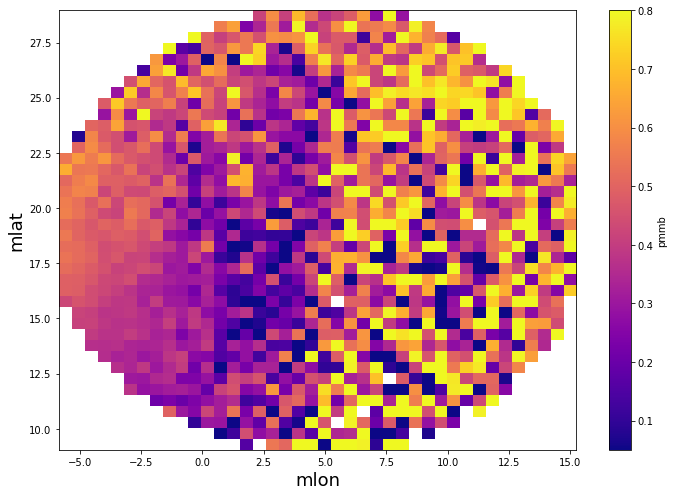

In [73]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['mlat'],
                RGB_CMD_cut['pmmb'], statistic = "mean", bins=40)

plt.imshow(result,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin =0.05 , vmax= 0.8)

plt.colorbar(label='pmmb')


plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
plt.tight_layout()

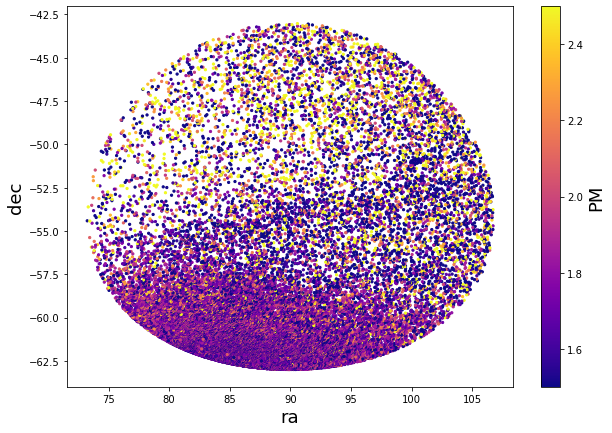

In [76]:
plt.figure(figsize=(10,7))
PM = RGB_CMD_cut['pm']
c = plt.scatter(RGB_CMD_cut['ra'], RGB_CMD_cut['dec'],
                c=PM, s=5, cmap='plasma', vmin = 1.5, vmax=2.5)
cbar = plt.colorbar(c)
cbar.set_label('PM', fontsize=18)
# plt.xlim(-100,100)
# plt.ylim(-150,150)
plt.xlabel('ra', fontsize=18)
plt.ylabel('dec', fontsize=18)
plt.show()

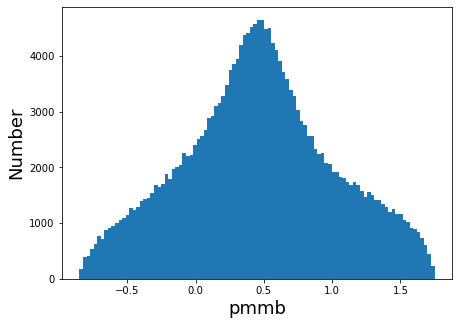

In [35]:
plt.figure(figsize=(7,5))
plt.hist(lmc_gaia_catalog_source_10deg_dec53['pmmb'][good10_53], bins=100)
# plt.xlim(-5, 50)
plt.xlabel('pmmb', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

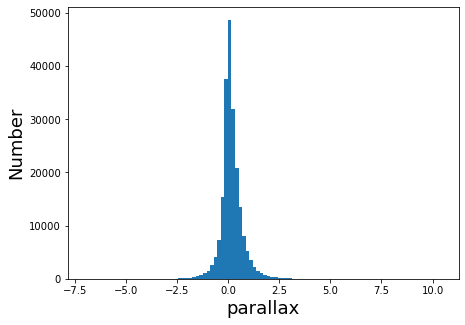

In [38]:
plt.figure(figsize=(7,5))
plt.hist(lmc_gaia_catalog_source_10deg_dec53['parallax'][good10_53], bins=100)
# plt.xlim(-5, 50)
plt.xlabel('parallax', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

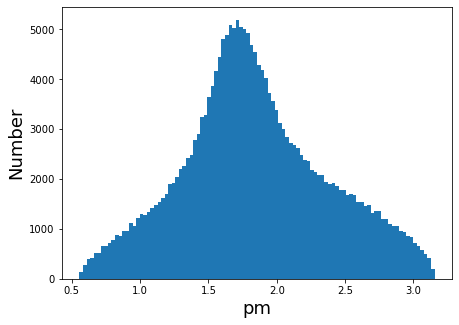

In [39]:
plt.figure(figsize=(7,5))
plt.hist(lmc_gaia_catalog_source_10deg_dec53['pm'][good10_53], bins=100)
# plt.xlim(-5, 50)
plt.xlabel('pm', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

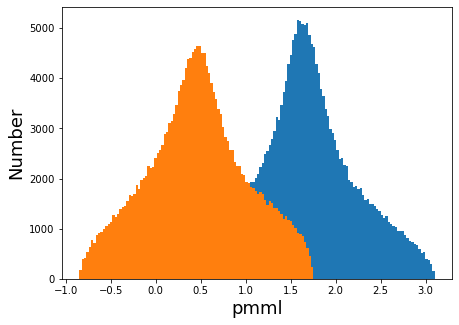

In [37]:
plt.figure(figsize=(7,5))
plt.hist(lmc_gaia_catalog_source_10deg_dec53['pmml'][good10_53], bins=100)
plt.hist(lmc_gaia_catalog_source_10deg_dec53['pmmb'][good10_53], bins=100)
# plt.xlim(-5, 50)
plt.xlabel('pmml', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

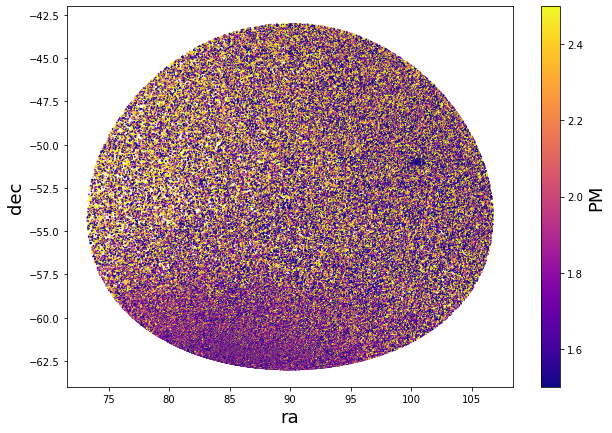

In [42]:
plt.figure(figsize=(10,7))
PM = lmc_gaia_catalog_source_10deg_dec53['pm'][good10_53]
c = plt.scatter(lmc_gaia_catalog_source_10deg_dec53['ra'][good10_53], lmc_gaia_catalog_source_10deg_dec53['dec'][good10_53],
                c=PM, s=0.5, cmap='plasma', vmin = 1.5, vmax=2.5)
cbar = plt.colorbar(c)
cbar.set_label('PM', fontsize=18)
# plt.xlim(-100,100)
# plt.ylim(-150,150)
plt.xlabel('ra', fontsize=18)
plt.ylabel('dec', fontsize=18)
plt.show()

In [3]:
result

<Table length=1520233>
        ra        ra_error ... phot_rp_mean_mag phot_g_mean_mag
     float64      float64  ...     float64          float64    
----------------- -------- ... ---------------- ---------------
97.90540983672476 0.077347 ...        16.741413       17.229221
97.32684426085923 0.034517 ...        16.008844         16.5413
97.31102682018623 0.927084 ...        19.739265       20.803495
97.31898564543056 2.859014 ...        20.455061       21.111319
97.30290734065721 0.034804 ...        15.775999       16.479656
97.30505371328742 0.280085 ...        19.039608       19.729568
              ...      ... ...              ...             ...
83.19543955368447  0.19531 ...        17.915482       19.098307
83.19526842215183 0.196383 ...         18.22334       19.218292
83.19886103553624 0.188471 ...        18.712982       19.174364
83.20256254219859 0.103598 ...        17.668982       18.264662
83.16938188444983  0.28029 ...        18.366646       19.612894
83.18602788460669 0.023776 ...        15.003031       15.530866
83.21449329803585 0.010635 ...        11.743382       12.177252

In [2]:
# result.write("gaia_source_5deg_ra_dec_90_60.fits", overwrite="True")
lmc_gaia_catalog_source_5deg = Table.read('gaia_source_5deg_ra_dec_90_60.fits')

In [3]:
lmc_catalog = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/lmc_distant_hydramike_gaiaedr3.fits')

In [27]:
good_lmc_catalog5, = np.where(np.isfinite(lmc_gaia_catalog_source_5deg['ra']) & 
                              np.isfinite(lmc_gaia_catalog_source_5deg['ra_error']) & 
                              np.isfinite(lmc_gaia_catalog_source_5deg['dec']) &
                              np.isfinite(lmc_gaia_catalog_source_5deg['dec_error']) &
                              np.isfinite(lmc_gaia_catalog_source_5deg['pmra']) & 
                              np.isfinite(lmc_gaia_catalog_source_5deg['pmra_error']) & 
                              np.isfinite(lmc_gaia_catalog_source_5deg['pmdec']) & 
                              np.isfinite(lmc_gaia_catalog_source_5deg['pmdec_error']) & 
                              np.isfinite(lmc_gaia_catalog_source_5deg['parallax']) & 
                              np.isfinite(lmc_gaia_catalog_source_5deg['parallax_error']) & 
                              np.isfinite(lmc_gaia_catalog_source_5deg['pm']) & 
#                               np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity']) & 
#                               np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity_error']) & 
#                               np.isfinite(lmc_gaia_catalog_source_5deg['teff_gspphot']) & 
#                               np.isfinite(lmc_gaia_catalog_source_5deg['logg_gspphot']) & 
                              np.isfinite(lmc_gaia_catalog_source_5deg['phot_bp_mean_mag']) & 
                              np.isfinite(lmc_gaia_catalog_source_5deg['phot_rp_mean_mag']) & 
                              np.isfinite(lmc_gaia_catalog_source_5deg['phot_g_mean_mag']))

In [28]:
len(good_lmc_catalog5)

1279818

In [5]:
good_lmc_catalog = lmc_gaia_catalog_source_5deg[np.where(np.isfinite(lmc_gaia_catalog_source_5deg['ra']) & np.isfinite(lmc_gaia_catalog_source_5deg['ra_error']) & np.isfinite(lmc_gaia_catalog_source_5deg['dec']) & np.isfinite(lmc_gaia_catalog_source_5deg['dec_error']) & np.isfinite(lmc_gaia_catalog_source_5deg['pmra']) & np.isfinite(lmc_gaia_catalog_source_5deg['pmra_error']) & np.isfinite(lmc_gaia_catalog_source_5deg['pmdec']) & np.isfinite(lmc_gaia_catalog_source_5deg['pmdec_error']) & np.isfinite(lmc_gaia_catalog_source_5deg['parallax']) & np.isfinite(lmc_gaia_catalog_source_5deg['parallax_error']) & np.isfinite(lmc_gaia_catalog_source_5deg['pm']) & np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity']) & np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity_error']) & np.isfinite(lmc_gaia_catalog_source_5deg['teff_gspphot']) & np.isfinite(lmc_gaia_catalog_source_5deg['logg_gspphot']) & np.isfinite(lmc_gaia_catalog_source_5deg['phot_bp_mean_mag']) & np.isfinite(lmc_gaia_catalog_source_5deg['phot_rp_mean_mag']) & np.isfinite(lmc_gaia_catalog_source_5deg['phot_g_mean_mag']))]

In [29]:
print(len(good_lmc_catalog5))
print(len(good_lmc_catalog))

1279818
29388


In [65]:
# Code to convert from ra,dec to Lat,Long in Magellanic Cloud Coordinates
import numpy as np
from gala.coordinates import MagellanicStreamNidever08
from astropy.coordinates import SkyCoord
import astropy.units as u

# convert pmra/pmdec to pmml/pmmb
coo = SkyCoord(ra=lmc_gaia_catalog_source_5deg['ra'].data*u.deg,dec=lmc_gaia_catalog_source_5deg['dec'].data*u.deg,
        pm_ra_cosdec=lmc_gaia_catalog_source_5deg['pmra'].data*u.mas/u.yr,
        pm_dec=lmc_gaia_catalog_source_5deg['pmdec'].data*u.mas/u.yr,frame='icrs')
mcoo = coo.transform_to(MagellanicStreamNidever08)
lmc_gaia_catalog_source_5deg['mlon'] = 0.0
lmc_gaia_catalog_source_5deg['mlat'] = 0.0
lmc_gaia_catalog_source_5deg['pmml'] = 0.0
lmc_gaia_catalog_source_5deg['pmmb'] = 0.0
lmc_gaia_catalog_source_5deg['mlon'] = mcoo.L
lmc_gaia_catalog_source_5deg['mlat'] = mcoo.B
lmc_gaia_catalog_source_5deg['pmml'] = mcoo.pm_L_cosB.value
lmc_gaia_catalog_source_5deg['pmmb'] = mcoo.pm_B.value

pmdist = np.sqrt((lmc_gaia_catalog_source_5deg['pmml']-1.80)**2 + (lmc_gaia_catalog_source_5deg['pmmb']-0.45)**2)
gdpm, = np.where((pmdist < 1.3))

In [30]:
good, = np.where((pmdist < 1.3) & 
                 np.isfinite(lmc_gaia_catalog_source_5deg['ra']) &
                 np.isfinite(lmc_gaia_catalog_source_5deg['ra_error']) &
                 np.isfinite(lmc_gaia_catalog_source_5deg['dec']) & 
                 np.isfinite(lmc_gaia_catalog_source_5deg['dec_error']) & 
                 np.isfinite(lmc_gaia_catalog_source_5deg['pmra']) & 
                 np.isfinite(lmc_gaia_catalog_source_5deg['pmra_error']) & 
                 np.isfinite(lmc_gaia_catalog_source_5deg['pmdec']) & 
                 np.isfinite(lmc_gaia_catalog_source_5deg['pmdec_error']) & 
                 np.isfinite(lmc_gaia_catalog_source_5deg['parallax']) & 
                 np.isfinite(lmc_gaia_catalog_source_5deg['parallax_error']) & 
                 np.isfinite(lmc_gaia_catalog_source_5deg['pm']) & 
#                  np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity']) & 
#                  np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity_error']) & 
#                  np.isfinite(lmc_gaia_catalog_source_5deg['teff_gspphot']) & 
#                  np.isfinite(lmc_gaia_catalog_source_5deg['logg_gspphot']) & 
                 np.isfinite(lmc_gaia_catalog_source_5deg['phot_bp_mean_mag']) & 
                 np.isfinite(lmc_gaia_catalog_source_5deg['phot_rp_mean_mag']) & 
                 np.isfinite(lmc_gaia_catalog_source_5deg['phot_g_mean_mag']))

In [9]:
# new catalog from lmc_gaia_catalog_source_5deg excluding nan values and a PM cut of pmdist < 1.3 
good_catalog = lmc_gaia_catalog_source_5deg[np.where((pmdist < 1.3)
                                                     & np.isfinite(lmc_gaia_catalog_source_5deg['ra']) & np.isfinite(lmc_gaia_catalog_source_5deg['ra_error']) & np.isfinite(lmc_gaia_catalog_source_5deg['dec']) & np.isfinite(lmc_gaia_catalog_source_5deg['dec_error']) & np.isfinite(lmc_gaia_catalog_source_5deg['pmra']) & np.isfinite(lmc_gaia_catalog_source_5deg['pmra_error']) & np.isfinite(lmc_gaia_catalog_source_5deg['pmdec']) & np.isfinite(lmc_gaia_catalog_source_5deg['pmdec_error']) & np.isfinite(lmc_gaia_catalog_source_5deg['parallax']) & np.isfinite(lmc_gaia_catalog_source_5deg['parallax_error']) & np.isfinite(lmc_gaia_catalog_source_5deg['pm']) & np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity']) & np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity_error']) & np.isfinite(lmc_gaia_catalog_source_5deg['teff_gspphot']) & np.isfinite(lmc_gaia_catalog_source_5deg['logg_gspphot']) & np.isfinite(lmc_gaia_catalog_source_5deg['phot_bp_mean_mag']) & np.isfinite(lmc_gaia_catalog_source_5deg['phot_rp_mean_mag']) & np.isfinite(lmc_gaia_catalog_source_5deg['phot_g_mean_mag']))]

In [31]:
print(len(gdpm))
print(len(good))
print(len(good_catalog))

515167
507343
859


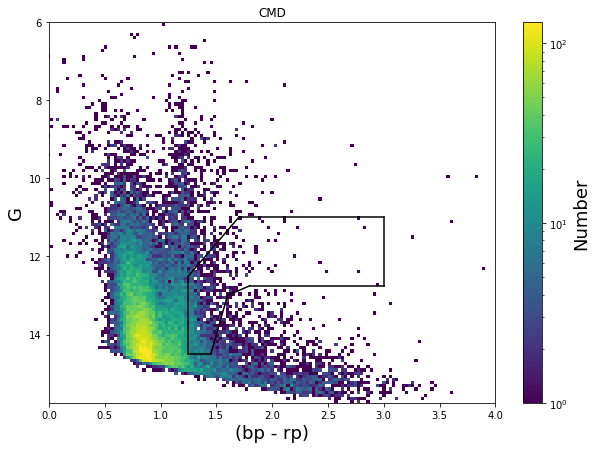

In [12]:
plt.figure(figsize=(10,7))


plt.hist2d(lmc_gaia_catalog_source_5deg['phot_bp_mean_mag'][good_lmc_catalog5] - lmc_gaia_catalog_source_5deg['phot_rp_mean_mag'][good_lmc_catalog5], 
          lmc_gaia_catalog_source_5deg['phot_g_mean_mag'][good_lmc_catalog5], range=None, bins=150, cmap='viridis', norm=LogNorm(), cmin=None)
cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('(bp - rp)', fontsize=18)
plt.ylabel('G', fontsize=18)
plt.xlim(0,4)
plt.ylim(6,15.75)
plt.gca().invert_yaxis()

plt.plot([1.25,1.25], [12.5,14.5],"BLACK", [1.25,1.45], [14.5,14.5], "BLACK",
        [1.45,1.6], [14.5,13], "BLACK", [1.6,1.8], [13,12.75], "BLACK", [1.8,3], [12.75,12.75], "BLACK", 
        [3,3], [12.75,11], "BLACK", [3,1.7], [11,11], "BLACK", [1.7,1.25], [11,12.5], "BLACK" )

# coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
# coord.append(coord[0]) #repeat the first point to create a 'closed loop'

# xs, ys = zip(*coord) #create lists of x and y values

# plt.figure()
# plt.plot(xs,ys) 
plt.title("CMD")
cbar.set_label('Number', fontsize=18)
plt.show()

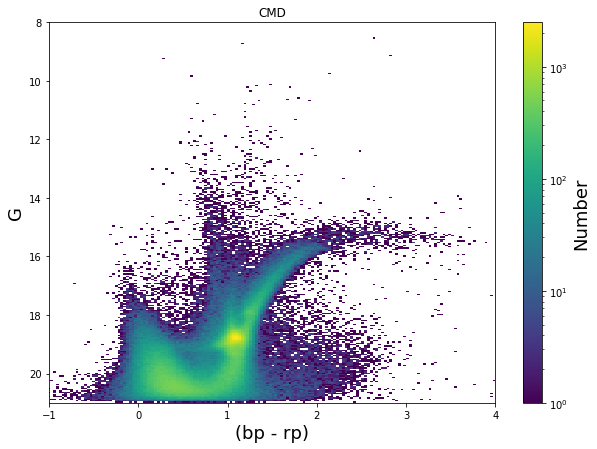

In [36]:
plt.figure(figsize=(10,7))


plt.hist2d(lmc_gaia_catalog_source_5deg['phot_bp_mean_mag'][good] - lmc_gaia_catalog_source_5deg['phot_rp_mean_mag'][good], 
          lmc_gaia_catalog_source_5deg['phot_g_mean_mag'][good], range=None, bins=300, cmap='viridis', norm=LogNorm(), cmin=1)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('(bp - rp)', fontsize=18)
plt.ylabel('G', fontsize=18)
plt.xlim(-1,4)
plt.ylim(8,21)
plt.gca().invert_yaxis()

# plt.plot([1.25,1.25], [12.5,14.5],"BLACK", [1.25,1.45], [14.5,14.5], "BLACK",
#         [1.45,1.6], [14.5,13], "BLACK", [1.6,1.8], [13,12.75], "BLACK", [1.8,3], [12.75,12.75], "BLACK", 
#         [3,3], [12.75,11], "BLACK", [3,1.7], [11,11], "BLACK", [1.7,1.25], [11,12.5], "BLACK" )

# coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
# coord.append(coord[0]) #repeat the first point to create a 'closed loop'

# xs, ys = zip(*coord) #create lists of x and y values

# plt.figure()
# plt.plot(xs,ys) 
plt.title("CMD")
cbar.set_label('Number', fontsize=18)
plt.show()

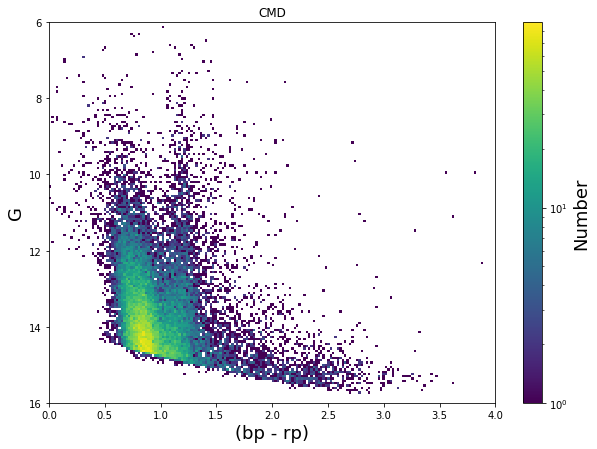

In [13]:
plt.figure(figsize=(10,7))


plt.hist2d(good_lmc_catalog['phot_bp_mean_mag'] - good_lmc_catalog['phot_rp_mean_mag'], 
          good_lmc_catalog['phot_g_mean_mag'], range=None, bins=200, cmap='viridis', norm=LogNorm(), cmin=None)
cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('(bp - rp)', fontsize=18)
plt.ylabel('G', fontsize=18)
plt.xlim(0,4)
plt.ylim(6,16)
plt.gca().invert_yaxis()

# plt.plot([1.25,1.25], [12.5,14.5],"BLACK", [1.25,1.45], [14.5,14.5], "BLACK",
#         [1.45,1.6], [14.5,13], "BLACK", [1.6,1.8], [13,12.75], "BLACK", [1.8,3], [12.75,12.75], "BLACK", 
#         [3,3], [12.75,11], "BLACK", [3,1.7], [11,11], "BLACK", [1.7,1.25], [11,12.5], "BLACK" )

# coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
# coord.append(coord[0]) #repeat the first point to create a 'closed loop'

# xs, ys = zip(*coord) #create lists of x and y values

# plt.figure()
# plt.plot(xs,ys) 
plt.title("CMD")
cbar.set_label('Number', fontsize=18)
plt.show()

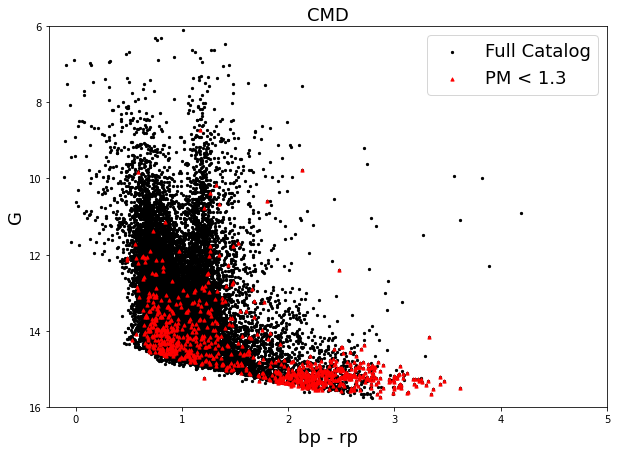

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(lmc_gaia_catalog_source_5deg['phot_bp_mean_mag'][good_lmc_catalog5] - lmc_gaia_catalog_source_5deg['phot_rp_mean_mag'][good_lmc_catalog5], 
            lmc_gaia_catalog_source_5deg['phot_g_mean_mag'][good_lmc_catalog5], s=5, c="Black", marker="o", label = "Full Catalog" )

plt.scatter(lmc_gaia_catalog_source_5deg['phot_bp_mean_mag'][good] - lmc_gaia_catalog_source_5deg['phot_rp_mean_mag'][good], 
            lmc_gaia_catalog_source_5deg['phot_g_mean_mag'][good], s=10, c="Red", marker="^", label = "PM < 1.3")
# plt.plot([-0.25,1.75], [-0.25,1.75], "BLACK")
plt.xlabel('bp - rp', fontsize=18)
plt.ylabel('G', fontsize=18)
plt.title("CMD", fontsize=18)
plt.xlim(-0.25,5)
plt.ylim(6,16)
plt.gca().invert_yaxis()
plt.legend(fontsize=18)
plt.show()

In [66]:
xcut = ([1.25,1.25], [1.25,1.45], [1.45,1.6], [1.6,1.8], [1.8,3], [3,3], [3,1.7], [1.7,1.25])
ycut = ([12.5,14.5], [14.5,14.5], [14.5,13], [13,12.75], [12.75,12.75], [12.75,11], [11,11], [11,12.5])
xdata = (lmc_gaia_catalog_source_5deg['phot_bp_mean_mag'][good_lmc_catalog5] - lmc_gaia_catalog_source_5deg['phot_rp_mean_mag'][good_lmc_catalog5])
ydata = lmc_gaia_catalog_source_5deg['phot_g_mean_mag'][good_lmc_catalog5]
ind, cutind = dln.roi_cut(xcut, ycut, xdata.data, ydata.data)

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (8, 2, 2).

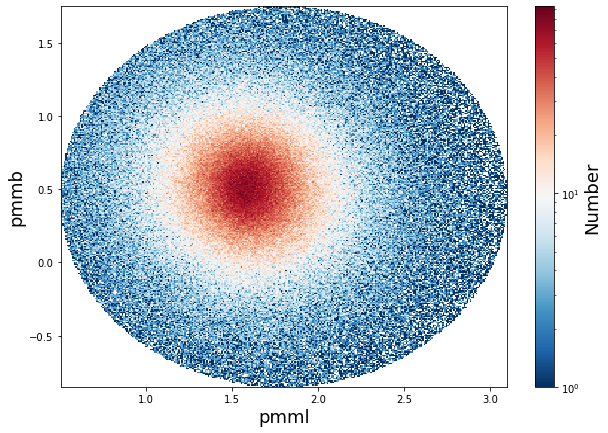

In [82]:
plt.figure(figsize=(10,7))
           
plt.hist2d(lmc_gaia_catalog_source_5deg['pmml'][gdpm], lmc_gaia_catalog_source_5deg['pmmb'][gdpm],
           range=None, bins=300, cmap='RdBu_r', norm=LogNorm(), cmin=None)
           
cbar = plt.colorbar(mappable=None, cax=None, ax=None)


plt.xlabel('pmml', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.xlim(0,3.5)
# plt.ylim(-1,2)
cbar.set_label('Number', fontsize=18)
plt.show()

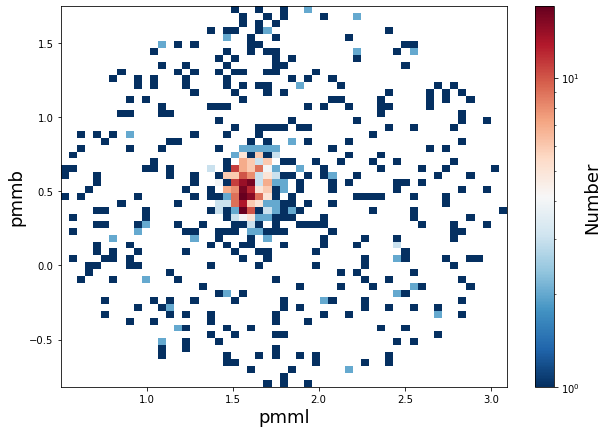

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(figsize=(10,7))
           
plt.hist2d(good_catalog['pmml'], good_catalog['pmmb'],
           range=None, bins=55, cmap='RdBu_r', norm=LogNorm(), cmin=1)
           
cbar = plt.colorbar(mappable=None, cax=None, ax=None)


plt.xlabel('pmml', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.xlim(0,3.5)
# plt.ylim(-1,2)
cbar.set_label('Number', fontsize=18)
plt.show()
plt.tight_layout()

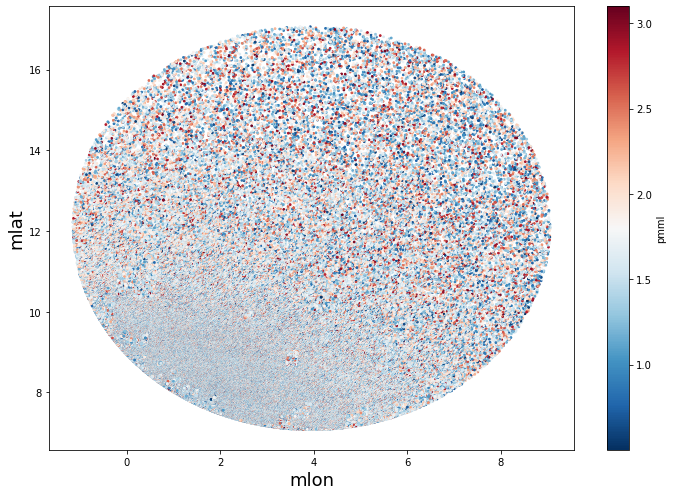

In [40]:
plt.figure(figsize=(10,7))


plt.scatter(lmc_gaia_catalog_source_5deg['mlon'][good], lmc_gaia_catalog_source_5deg['mlat'][good],
                c=lmc_gaia_catalog_source_5deg['pmml'][good], s=3, cmap='RdBu_r')

# plt.plot([1.7,1.7], [-1,2.5], "BLACK")
# plt.plot([15,20], [0,0], "BLACK")

plt.colorbar(label='pmml')

# cbar = plt.colorbar(c)
# cbar.set_label('pmml', fontsize=18)

# plt.text(0.1, 1.75, "pmml mean: 1.673", c="Black", fontsize=12)
# plt.text(0.1, 1.6, "pmmb mean: 0.508", c="Black", fontsize=12)

# plt.xlim(0,3.5)
# plt.ylim(-1,2)

plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
plt.tight_layout()

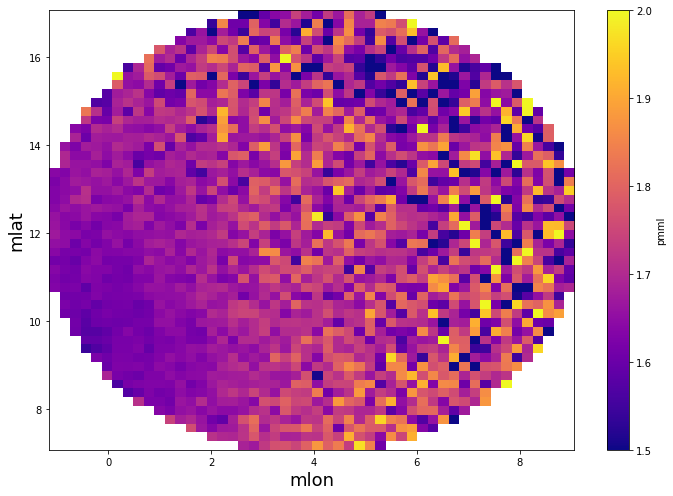

In [58]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(lmc_gaia_catalog_source_5deg['mlon'][good], lmc_gaia_catalog_source_5deg['mlat'][good],
                lmc_gaia_catalog_source_5deg['pmml'][good], statistic = "mean", bins=50)

plt.imshow(result,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin =1.5 , vmax= 2)

plt.colorbar(label='pmml')


plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
plt.tight_layout()

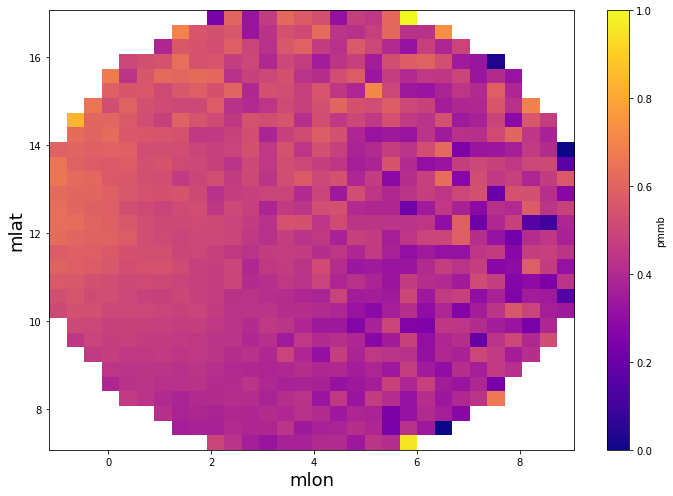

In [57]:
plt.figure(figsize=(10,7))

from scipy.stats import binned_statistic_2d

result,xedge,yedge,binnumber = binned_statistic_2d(lmc_gaia_catalog_source_5deg['mlon'][good], lmc_gaia_catalog_source_5deg['mlat'][good],
                lmc_gaia_catalog_source_5deg['pmmb'][good], statistic = "mean", bins=30)

plt.imshow(result, extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin=0, vmax=1)

plt.colorbar(label='pmmb')


plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
plt.tight_layout()

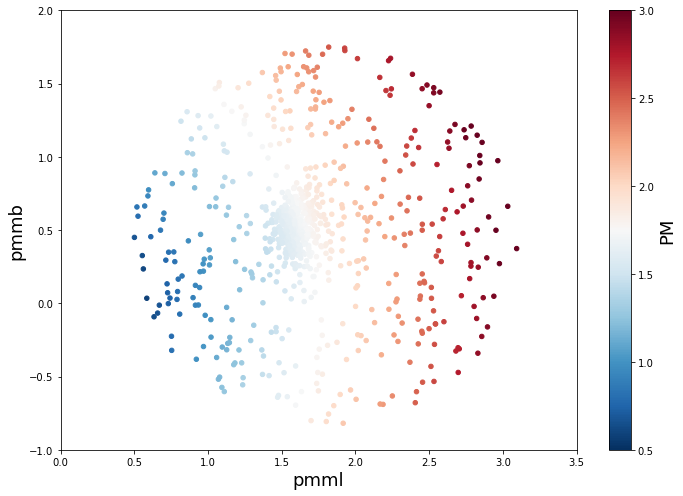

In [15]:
plt.figure(figsize=(10,7))


c = plt.scatter(good_catalog['pmml'], good_catalog['pmmb'],
                c=good_catalog['pm'], s=20, cmap='RdBu_r', vmin = 0.5, vmax=3)

# plt.plot([1.7,1.7], [-1,2.5], "BLACK")
# plt.plot([15,20], [0,0], "BLACK")

cbar = plt.colorbar(c)
cbar.set_label('PM', fontsize=18)

# plt.text(0.1, 1.75, "pmml mean: 1.673", c="Black", fontsize=12)
# plt.text(0.1, 1.6, "pmmb mean: 0.508", c="Black", fontsize=12)

plt.xlim(0,3.5)
plt.ylim(-1,2)

plt.xlabel('pmml', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
plt.tight_layout()


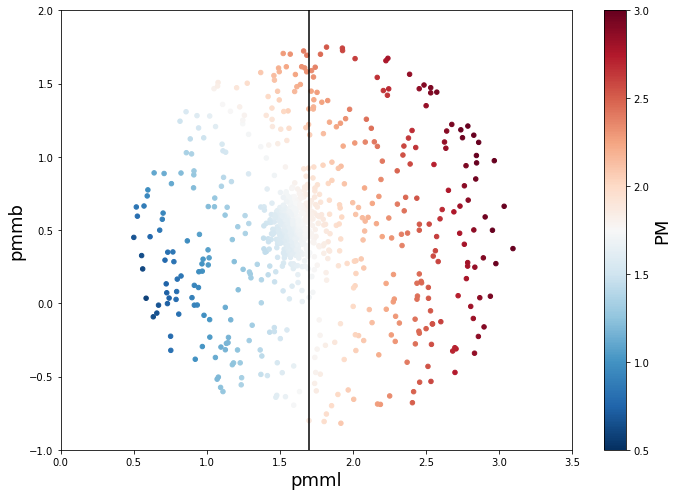

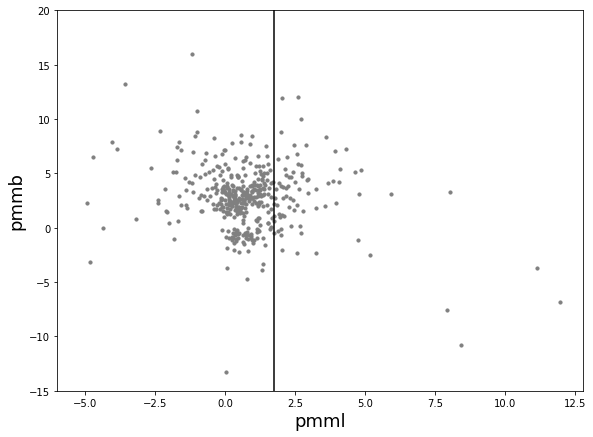

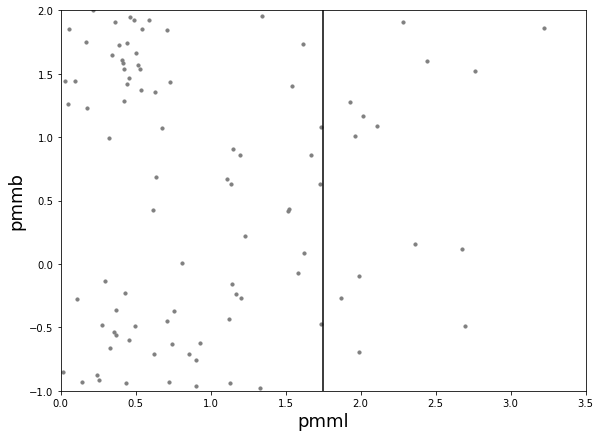

In [48]:
## Figure 1
plt.figure(figsize=(28,7))
plt.subplot(1,3,1)

c = plt.scatter(good_catalog['pmml'], good_catalog['pmmb'],
                c=good_catalog['pm'], s=20, cmap='RdBu_r', vmin = 0.5, vmax=3)

plt.plot([1.7,1.7], [-1,2.5], "BLACK")
# plt.plot([15,20], [0,0], "BLACK")

cbar = plt.colorbar(c)
cbar.set_label('PM', fontsize=18)

# plt.text(0.1, 1.75, "pmml mean: 1.673", c="Black", fontsize=12)
# plt.text(0.1, 1.6, "pmmb mean: 0.508", c="Black", fontsize=12)

plt.xlim(0,3.5)
plt.ylim(-1,2)

plt.xlabel('pmml', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
plt.tight_layout()


#Figure 2
plt.figure(figsize=(32,7))
plt.subplot(1,3,2)

plt.scatter(lmc_catalog['GAIAEDR3_PMML'], lmc_catalog['GAIAEDR3_PMMB'],
                c="GRAY", s=10, marker="o")
plt.plot([1.75,1.75], [-50, 50], "BLACK")

# plt.text(8, 15, "PMML Mean: 0.7579", c="Black", fontsize=12)
# plt.text(8, 14, "PMMB Mean: 2.768", c="Black", fontsize=12)

plt.xlim(-6,12.75)
plt.ylim(-15,20)

plt.xlabel('pmml', fontsize=18)
plt.ylabel('pmmb', fontsize=18)


#Figure 3
plt.figure(figsize=(32,7))
plt.subplot(1,3,3)

plt.scatter(lmc_catalog['GAIAEDR3_PMML'], lmc_catalog['GAIAEDR3_PMMB'],
                c="GRAY", s=10, marker="o")
plt.plot([1.75,1.75], [-50, 50], "BLACK")

# plt.text(8, 15, "PMML Mean: 0.7579", c="Black", fontsize=12)
# plt.text(8, 14, "PMMB Mean: 2.768", c="Black", fontsize=12)

plt.xlim(0,3.5)
plt.ylim(-1,2)

plt.xlabel('pmml', fontsize=18)
plt.ylabel('pmmb', fontsize=18)

plt.show()


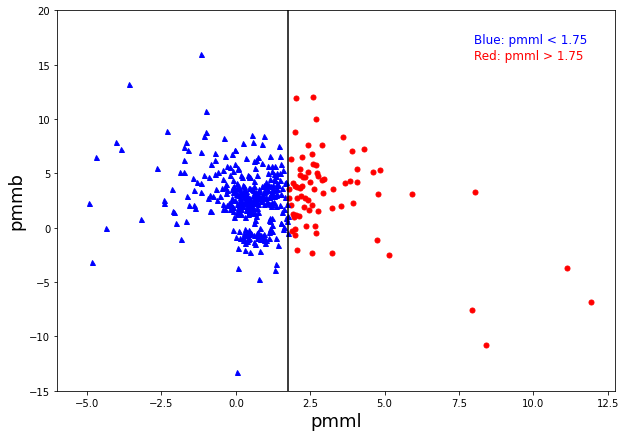

In [65]:
plt.figure(figsize=(10,7))

def line_condition(pmml_condition, pmml_limit):
    condition1 = pmml_condition > pmml_limit
    return condition1

for each_star in lmc_catalog:
    if line_condition(each_star['GAIAEDR3_PMML'],
                     1.75):
        plt.plot(each_star['GAIAEDR3_PMML'], each_star['GAIAEDR3_PMMB'],
                 marker = 'o', markersize = 5, color = 'red', linestyle = 'None', alpha = 1)
    else:
        plt.plot(each_star['GAIAEDR3_PMML'], each_star['GAIAEDR3_PMMB'],
                 marker = '^', markersize = 5, color = 'blue', linestyle = 'None', alpha = 1)


plt.text(8, 17, "Blue: pmml < 1.75", c="Blue", fontsize=12)
plt.text(8, 15.5, "Red: pmml > 1.75", c="Red", fontsize=12)

plt.xlim(-6,12.75)
plt.ylim(-15,20)
plt.xlabel('pmml', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.legend()
plt.plot([1.75,1.75], [-50, 50], "BLACK")



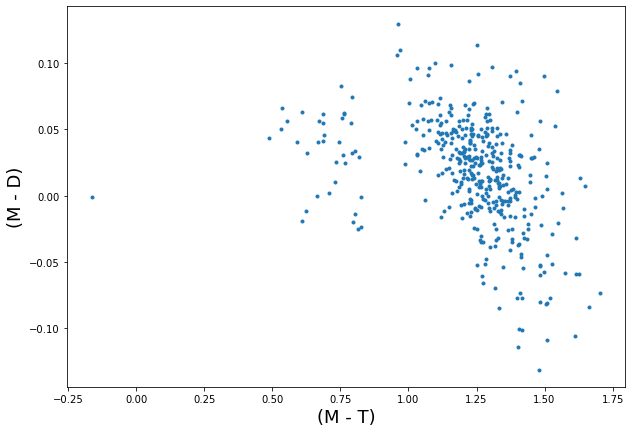

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(lmc_catalog['M'] - lmc_catalog['T'], lmc_catalog['M'] - lmc_catalog['D'], s=None, c=None, marker="." )
plt.xlabel('(M - T)', fontsize=18)
plt.ylabel('(M - D)', fontsize=18)
plt.show()

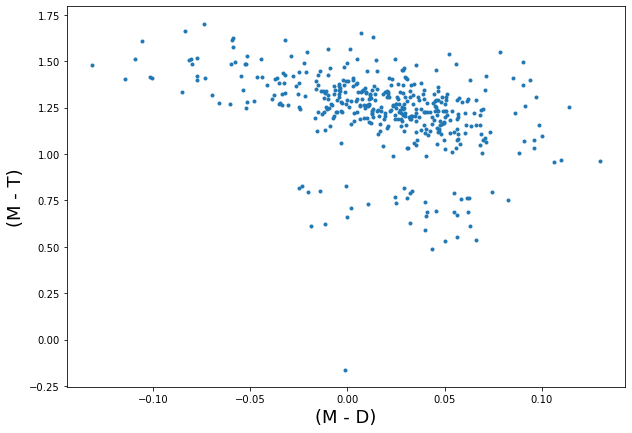

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(lmc_catalog['M'] - lmc_catalog['D'], lmc_catalog['M'] - lmc_catalog['T'], s=None, c=None, marker="." )
plt.xlabel('(M - D)', fontsize=18)
plt.ylabel('(M - T)', fontsize=18)
plt.show()

In [67]:
print(np.mean(good_catalog['pmml']))
print(np.mean(good_catalog['pmmb']))
print(np.mean(good_catalog['pm'])) 

1.6730447332350733
0.5078698312408848
1.8101803271245633


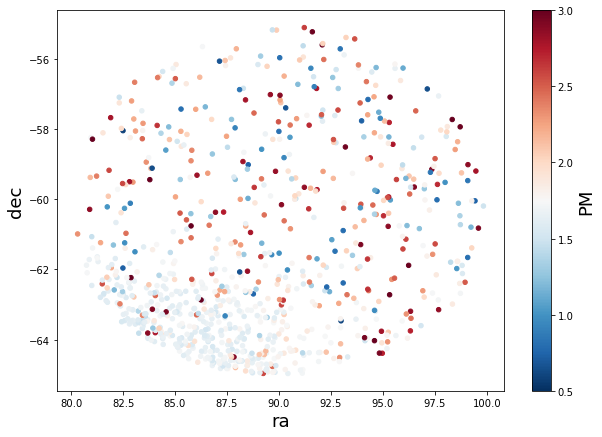

In [60]:
plt.figure(figsize=(10,7))
PM = good_catalog['pm']
c = plt.scatter(good_catalog['ra'], good_catalog['dec'],
                c=PM, s=20, cmap='RdBu_r', vmin = 0.5, vmax=3)
cbar = plt.colorbar(c)
cbar.set_label('PM', fontsize=18)
# plt.xlim(-100,100)
# plt.ylim(-150,150)
plt.xlabel('ra', fontsize=18)
plt.ylabel('dec', fontsize=18)
plt.show()

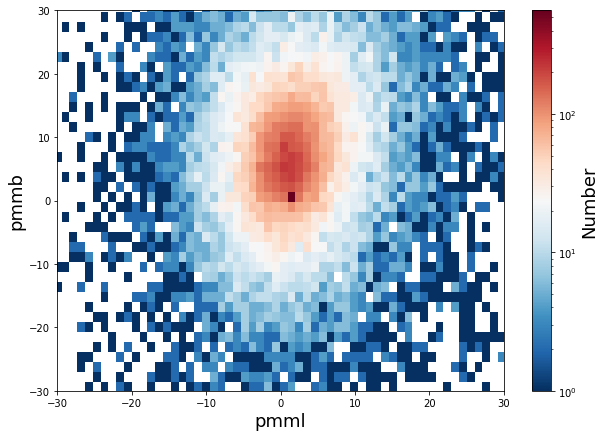

In [96]:
plt.figure(figsize=(10,7))
           
plt.hist2d(lmc_gaia_catalog_source_5deg['pmml'][good_lmc_catalog5], lmc_gaia_catalog_source_5deg['pmmb'][good_lmc_catalog5],
           range=None, bins=1000, cmap='RdBu_r', norm=LogNorm(), cmin=None)
           
cbar = plt.colorbar(mappable=None, cax=None, ax=None)


plt.xlabel('pmml', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
plt.xlim(-30,30)
plt.ylim(-30,30)
cbar.set_label('Number', fontsize=18)
plt.show()

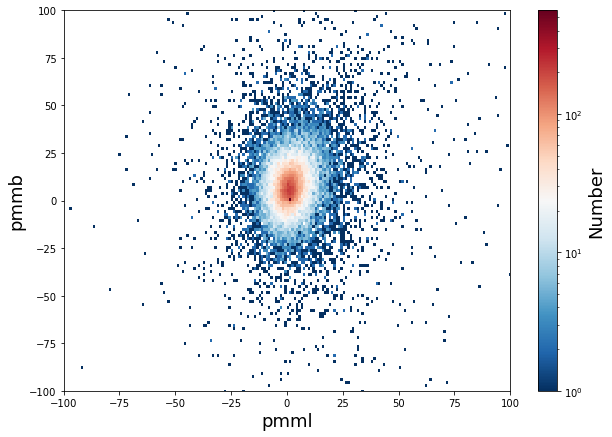

In [95]:
plt.figure(figsize=(10,7))
           
plt.hist2d(lmc_gaia_catalog_source_5deg['pmml'][good_lmc_catalog5], lmc_gaia_catalog_source_5deg['pmmb'][good_lmc_catalog5],
           range=None, bins=1000, cmap='RdBu_r', norm=LogNorm(), cmin=None)
           
cbar = plt.colorbar(mappable=None, cax=None, ax=None)


plt.xlabel('pmml', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
plt.xlim(-100,100)
plt.ylim(-100,100)
cbar.set_label('Number', fontsize=18)
plt.show()

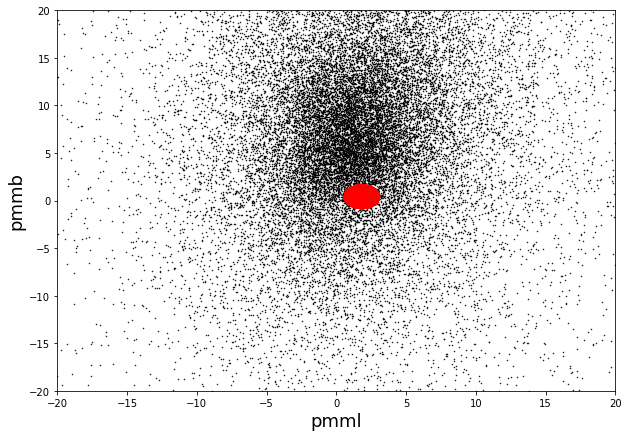

In [55]:
plt.figure(figsize=(10,7))
plt.scatter(lmc_gaia_catalog_source_5deg['pmml'][good_lmc_catalog5],
            lmc_gaia_catalog_source_5deg['pmmb'][good_lmc_catalog5], s=1, c="Black", marker=".")
plt.scatter(lmc_gaia_catalog_source_5deg['pmml'][gdpm],
            lmc_gaia_catalog_source_5deg['pmmb'][gdpm], s=0.0000001, c="Red", marker="^")
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.xlabel('pmml', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
plt.show()

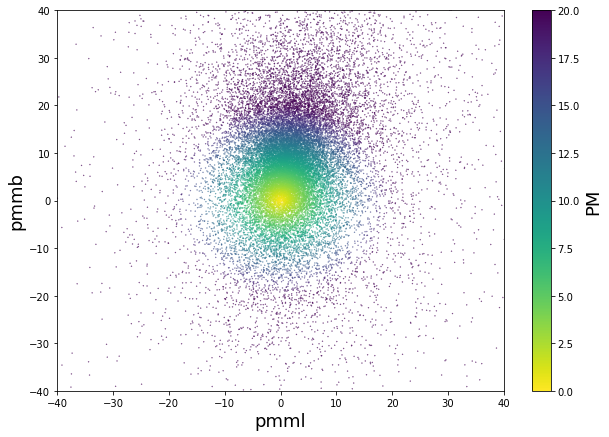

In [49]:
plt.figure(figsize=(10,7))

c = plt.scatter(lmc_gaia_catalog_source_5deg['pmml'][good_lmc_catalog5], lmc_gaia_catalog_source_5deg['pmmb'][good_lmc_catalog5],
                c=lmc_gaia_catalog_source_5deg['pm'][good_lmc_catalog5], s=0.1, cmap='viridis_r', vmin = 0, vmax=20)


# plt.plot([15,20], [0,0], "BLACK")

cbar = plt.colorbar(c)
cbar.set_label('PM', fontsize=18)

plt.xlim(-40,40)
plt.ylim(-40,40)

plt.xlabel('pmml', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
plt.show()

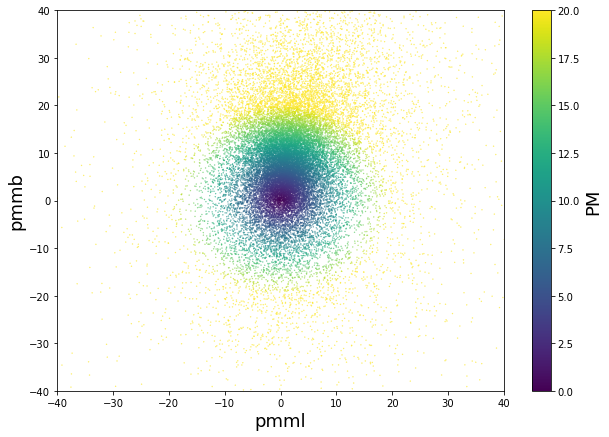

In [16]:
plt.figure(figsize=(10,7))

c = plt.scatter(lmc_gaia_catalog_source_5deg['pmml'][good_lmc_catalog5], lmc_gaia_catalog_source_5deg['pmmb'][good_lmc_catalog5],
                c=lmc_gaia_catalog_source_5deg['pm'][good_lmc_catalog5], s=0.1, cmap='viridis', vmin = 0, vmax=20)


# plt.plot([15,20], [0,0], "BLACK")

cbar = plt.colorbar(c)
cbar.set_label('PM', fontsize=18)

plt.xlim(-40,40)
plt.ylim(-40,40)

plt.xlabel('pmml', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
plt.show()

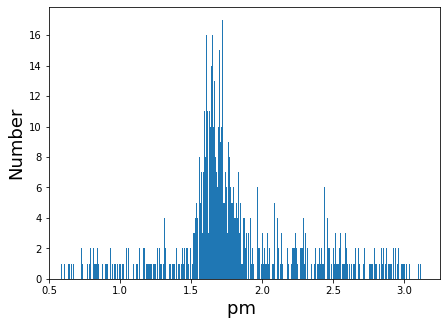

In [46]:
plt.figure(figsize=(7,5))
plt.hist(good_catalog['pm'], bins=500)
plt.xlim(0.5, 3.25)
plt.xlabel('pm ', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

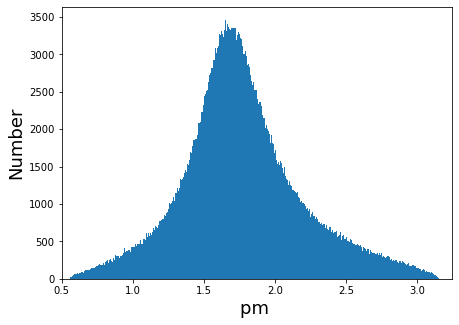

In [47]:
plt.figure(figsize=(7,5))
plt.hist(lmc_gaia_catalog_source_5deg['pm'][gdpm], bins=500)
plt.xlim(0.5, 3.25)
plt.xlabel('pm ', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

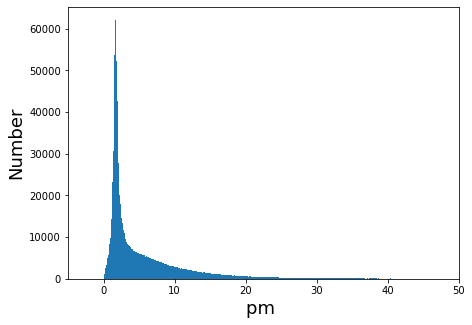

In [37]:
plt.figure(figsize=(7,5))
plt.hist(lmc_gaia_catalog_source_5deg['pm'], bins=10000)
plt.xlim(-5, 50)
plt.xlabel('pm ', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

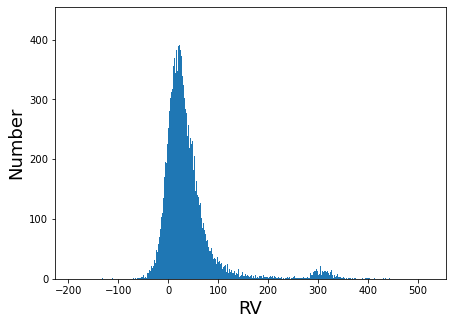

In [14]:
plt.figure(figsize=(7,5))
plt.hist(lmc_gaia_catalog_source_5deg['radial_velocity'], bins=1000)
# plt.xlim(-5, 50)
plt.xlabel('RV', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

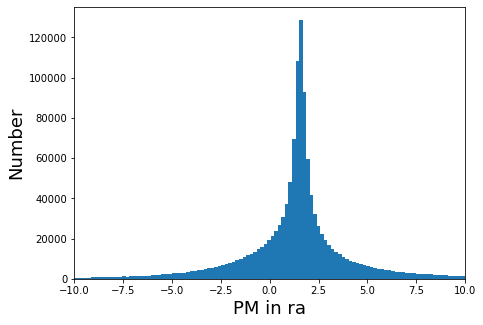

In [73]:
plt.figure(figsize=(7,5))
plt.hist(lmc_gaia_catalog_source_5deg['pmra'], bins=6000)
plt.xlim(-10, 10)
plt.xlabel('PM in ra', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

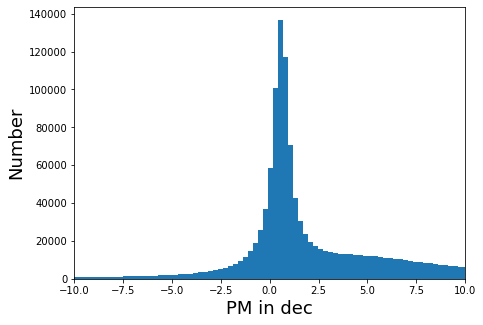

In [74]:
plt.figure(figsize=(7,5))
plt.hist(lmc_gaia_catalog_source_5deg['pmdec'], bins=6000)
plt.xlim(-10, 10)
plt.xlabel('PM in dec', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.show()

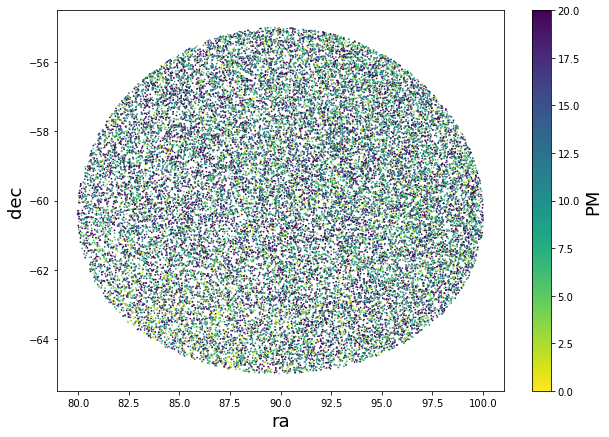

In [47]:
plt.figure(figsize=(10,7))
PM = lmc_gaia_catalog_source_5deg['pm'][good_lmc_catalog5]
c = plt.scatter(lmc_gaia_catalog_source_5deg['ra'][good_lmc_catalog5], lmc_gaia_catalog_source_5deg['dec'][good_lmc_catalog5],
                c=PM, s=0.5, cmap='viridis_r', vmin = 0, vmax=20)
cbar = plt.colorbar(c)
cbar.set_label('PM', fontsize=18)
# plt.xlim(-100,100)
# plt.ylim(-150,150)
plt.xlabel('ra', fontsize=18)
plt.ylabel('dec', fontsize=18)
plt.show()

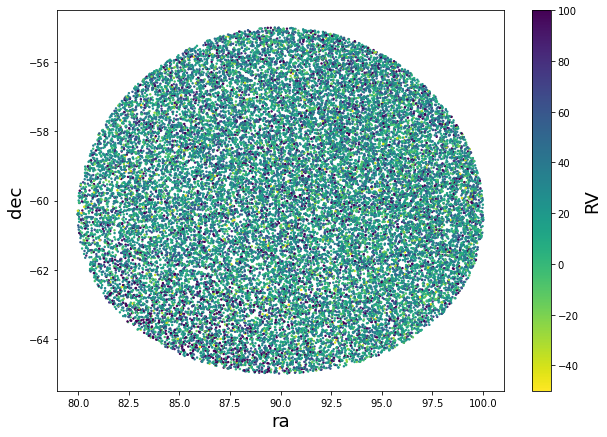

In [76]:
plt.figure(figsize=(10,7))
RV = lmc_gaia_catalog_source_5deg['radial_velocity'][good_lmc_catalog5]
c = plt.scatter(lmc_gaia_catalog_source_5deg['ra'][good_lmc_catalog5], lmc_gaia_catalog_source_5deg['dec'][good_lmc_catalog5],
                c=RV, s=2, cmap='viridis_r', vmin = -50, vmax=100)
cbar = plt.colorbar(c)
cbar.set_label('RV', fontsize=18)
# plt.xlim(-100,100)
# plt.ylim(-150,150)
plt.xlabel('ra', fontsize=18)
plt.ylabel('dec', fontsize=18)
plt.show()

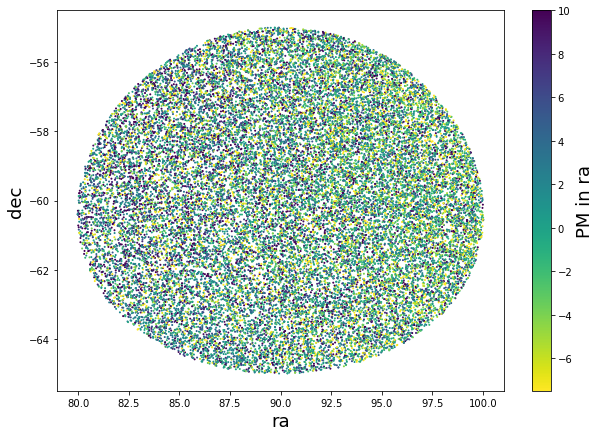

In [79]:
plt.figure(figsize=(10,7))

c = plt.scatter(lmc_gaia_catalog_source_5deg['ra'][good_lmc_catalog5], lmc_gaia_catalog_source_5deg['dec'][good_lmc_catalog5],
                c=lmc_gaia_catalog_source_5deg['pmra'][good_lmc_catalog5], s=1, cmap='viridis_r', vmin = -7.5, vmax= 10)


# plt.plot([15,20], [0,0], "BLACK")

cbar = plt.colorbar(c)
cbar.set_label('PM in ra', fontsize=18)


plt.xlabel('ra', fontsize=18)
plt.ylabel('dec', fontsize=18)
plt.show()

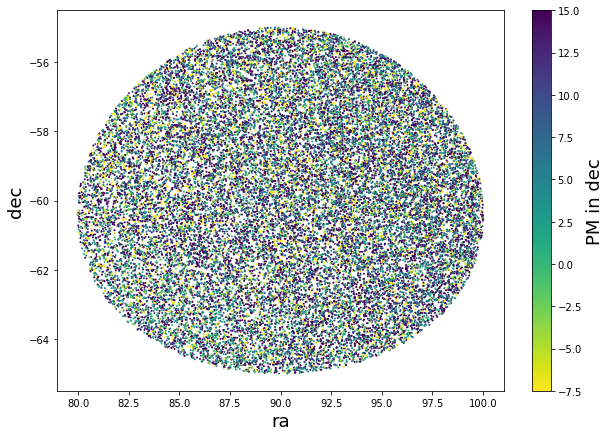

In [80]:
plt.figure(figsize=(10,7))

c = plt.scatter(lmc_gaia_catalog_source_5deg['ra'][good_lmc_catalog5], lmc_gaia_catalog_source_5deg['dec'][good_lmc_catalog5],
                c=lmc_gaia_catalog_source_5deg['pmdec'][good_lmc_catalog5], s=1, cmap='viridis_r', vmin = -7.5, vmax= 15)


# plt.plot([15,20], [0,0], "BLACK")

cbar = plt.colorbar(c)
cbar.set_label('PM in dec', fontsize=18)


plt.xlabel('ra', fontsize=18)
plt.ylabel('dec', fontsize=18)
plt.show()

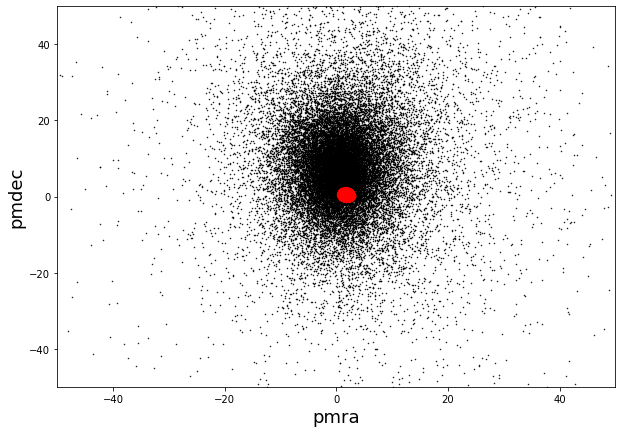

In [34]:
plt.figure(figsize=(10,7))
plt.scatter(lmc_gaia_catalog_source_5deg['pmra'][good_lmc_catalog5],
            lmc_gaia_catalog_source_5deg['pmdec'][good_lmc_catalog5], s=1, c="Black", marker=".")
plt.scatter(lmc_gaia_catalog_source_5deg['pmra'][gdpm],
            lmc_gaia_catalog_source_5deg['pmdec'][gdpm], s=5, c="Red", marker="^")
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.xlabel('pmra', fontsize=18)
plt.ylabel('pmdec', fontsize=18)
plt.show()

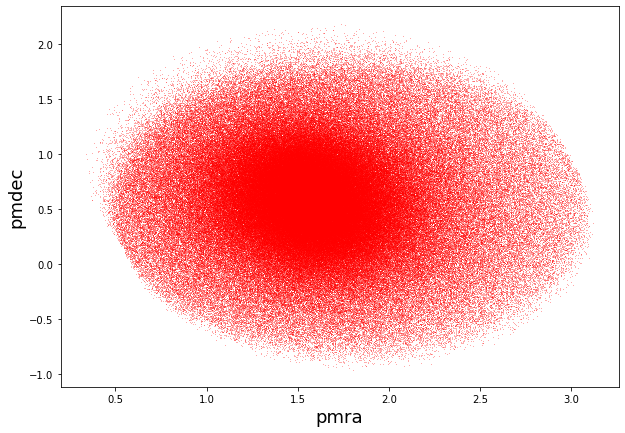

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(lmc_gaia_catalog_source_5deg['pmra'][gdpm],
            lmc_gaia_catalog_source_5deg['pmdec'][gdpm], s=0.0000001, c="Red", marker="^")
# plt.xlim(-50,50)
# plt.ylim(-50,50)
plt.xlabel('pmra', fontsize=18)
plt.ylabel('pmdec', fontsize=18)
plt.show()